# PRCP-1021 - InsCostPred

## Table of Contents

##### 1.Importing Necessary Libraries
##### 2.Load Datasets
##### 3.Exploratory Data Analysis
##### 4.Data Preprocessing
##### 5.Feature Selection
##### 6.Model Implementation
##### 7.Model Evaluation
##### 8.Model Comparison Report
##### 9.Challenges Faced Report
##### 10.Conclusion

## Business Case

### To predict the Charges of the Insurance costs based on the given input features

## Objectives

- **Exploratory Data Analysis (EDA):** Perform an in-depth examination of the dataset to identify patterns, relationships, and outliers using statistical methods and visualizations.  
- **Data Preparation:** Clean and preprocess the data to ensure it is ready for accurate model predictions.  
- **Model Building:** Develop various regression models to predict insurance charges based on input features.  
- **Model Selection and Training:** Experiment with different machine learning models to identify the best-performing one.  
- **Hyperparameter Optimization:** Fine-tune model parameters to enhance predictive performance.  
- **Performance Evaluation:** Assess model performance using metrics such as RMSE, MAE, and R² to validate prediction accuracy.  


## Importing Necessary Libraries

In [207]:
# Basic Libraries  
import pandas as pd  
import numpy as np  

# Visualization Libraries  
import matplotlib.pyplot as plt  
%matplotlib inline  
import seaborn as sns  

# Warnings  
import warnings  
warnings.filterwarnings('ignore')  

# Preprocessing and Feature Engineering  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline, make_pipeline  

# Model Selection and Tuning  
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  

# Regression Models  
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.svm import SVR  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  
from xgboost import XGBRegressor  
from sklearn.neural_network import MLPRegressor  

# Evaluation Metrics  
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error  


## Loading Data

In [210]:
# Importing the dataset
df = pd.read_csv("datasets_13720_18513_insurance(1).csv")

## Domain Analysis

#### Feature Information  

- **Age**: Age of the primary beneficiary.  
- **Sex**: Gender of the beneficiary (male or female).  
- **BMI**: Body Mass Index, an indicator of body fat based on height and weight (kg/m²), with an ideal range between 18.5 and 24.9.  
- **Children**: Number of dependents or children covered by the health insurance policy.  
- **Smoker**: Indicates whether the beneficiary is a smoker or non-smoker.  
- **Region**: Geographic region where the beneficiary resides in the U.S. (northeast, southeast, southwest, or northwest).  
- **Charges**: Medical expenses billed to the individual by the health insurance provider (**target variable**).  


## Exploratory Data Analysis

### Basic checks

In [216]:
# Top 5 rows
df.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [218]:
# Bottom 5 rows
df.tail(5)

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [220]:
# Dimensions of rows and columns
df.shape

(1338, 7)

In [222]:
# Total size of the dataset
df.size

9366

In [224]:
# Column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [226]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [228]:
df.describe(include='O')

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

## Insights

- The **average age** is **39**. However, the high standard deviation tells us we've got a diverse range of ages.
- The **average BMI** of **30.66** but the high standard deviation means we've also got people with normal and low BMIs.
- The **average Charges** of insurance is **13270**. The **minimum Charges** of insurance is **1121** and **maximum Charges** of insurance is **63770**.

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Insights

- This dataset contains **1338 records**, **6 feature columns** and **1 target column**.
- The dataset have a total of **9366 entries** and **no null values**.

### Univariate analysis

In [237]:
only_numeric = df.select_dtypes(exclude="object")

In [239]:
non_numeric = df.select_dtypes(include="object")

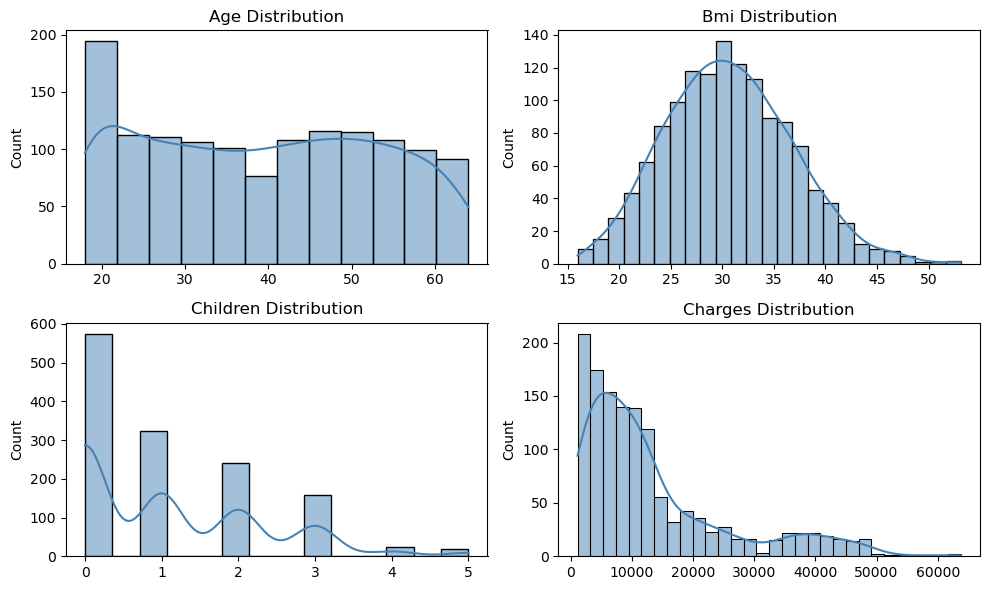

In [241]:
plotnumber=1
plt.figure(figsize=(10,6))
for i in df.select_dtypes(['int','float']):
    plt.subplot(2,2,plotnumber)
    sns.histplot(data = df, x=i, kde=True, color = 'steelblue')
    plt.xlabel('')
    plt.title(f'{i.capitalize()} Distribution')
    plotnumber += 1
plt.tight_layout()

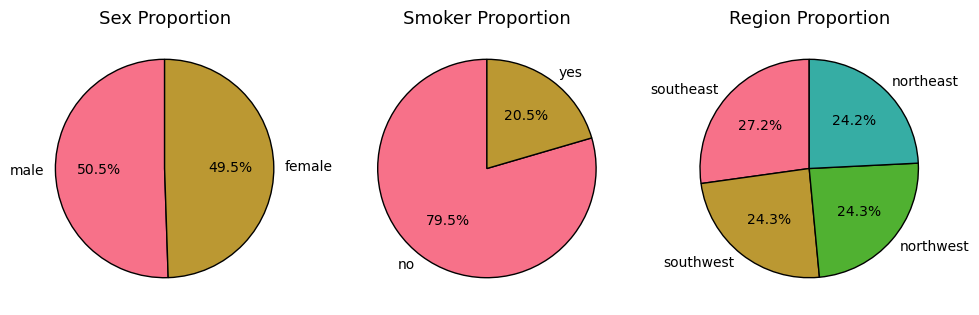

In [242]:
plotnumber = 1
plt.figure(figsize=(10, 10))
for i in df.select_dtypes(['object']):
    plt.subplot(1, 3, plotnumber)
    values = df[i].value_counts()
    plt.pie(
        values,
        labels=values.index,
        autopct='%1.1f%%',  
        startangle=90,
        colors=sns.color_palette('husl'),  
        wedgeprops={'edgecolor': 'black'} ) 

    plt.title(f'{i.capitalize()} Proportion', fontsize=13)
    plotnumber += 1
plt.tight_layout()
plt.show()

### Bivariate analysis

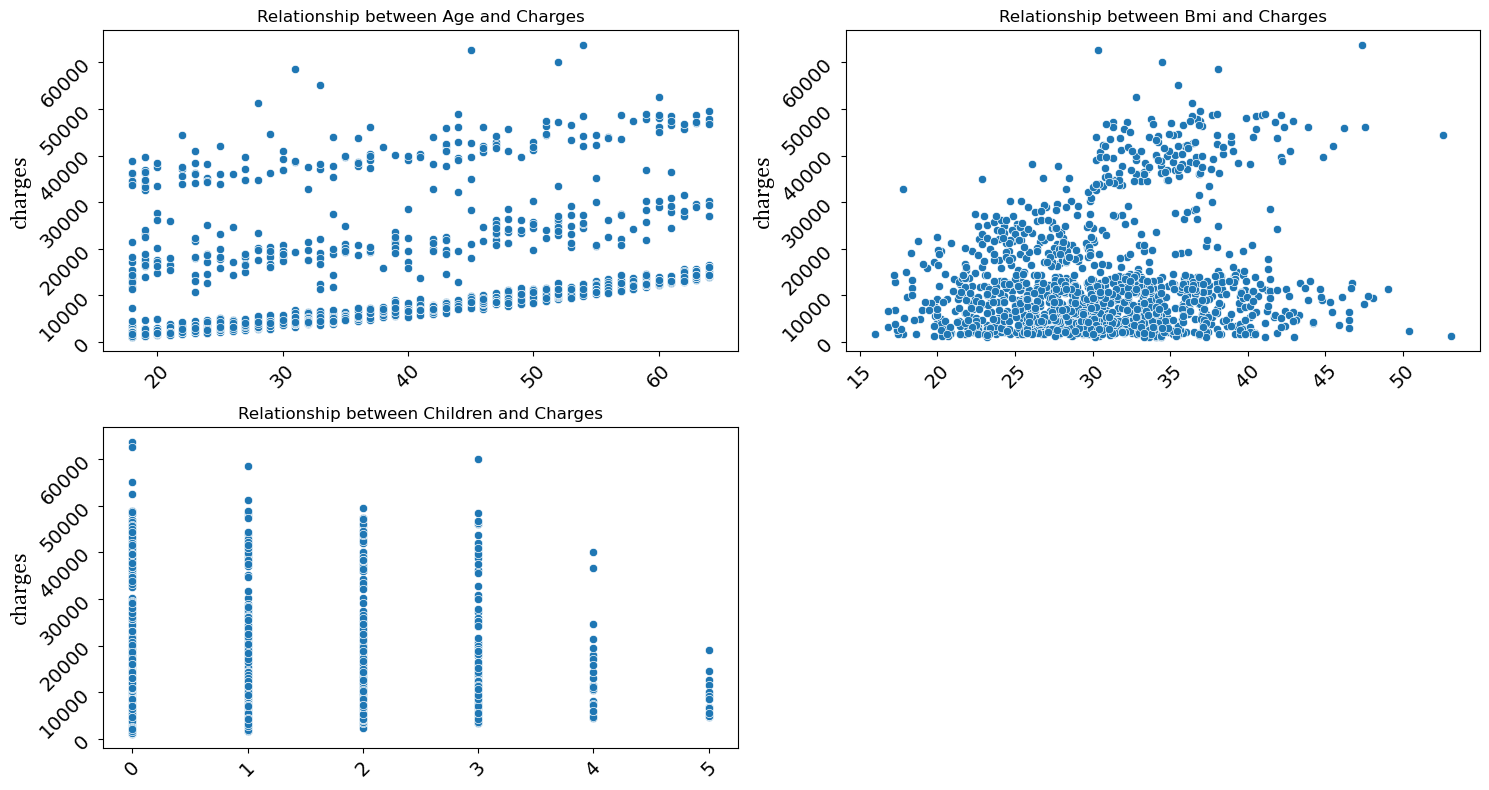

In [246]:
plt.figure(figsize=(15,8))
window=1
for i in df.drop(['sex','smoker','region','charges'],axis=1):
    plt.subplot(2,2,window)
    sns.scatterplot(x=i,y='charges',data=df)
    plt.xticks(fontsize=14,rotation =45)
    plt.yticks(fontsize=14,rotation =45)
    plt.xlabel('',fontsize=16,fontfamily='Cambria')
    plt.ylabel('charges',fontsize=16,fontfamily='Cambria')
    plt.title(f'Relationship between {i.capitalize()} and Charges')
    window+=1
plt.tight_layout()

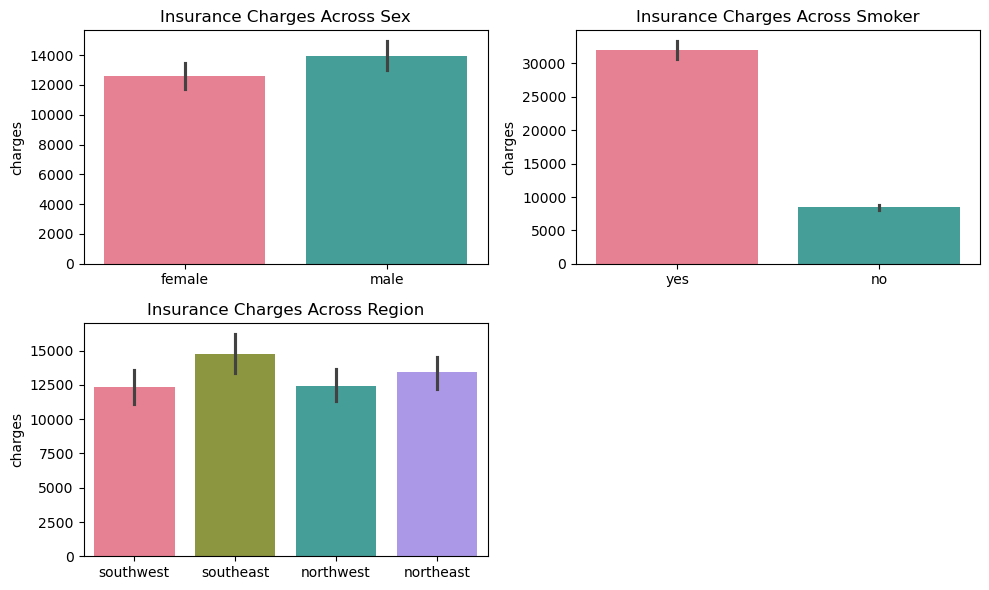

In [247]:
plt.figure(figsize=(10,6))
w=1
for i in non_numeric.columns:
    plt.subplot(2,2,w)
    sns.barplot(x=i,y = df.charges, data=df,palette="husl")
    plt.title(f"Insurance Charges Across {i.capitalize()}")
    plt.xlabel('')
    w = w+1
plt.tight_layout()

### Multivariate analysis

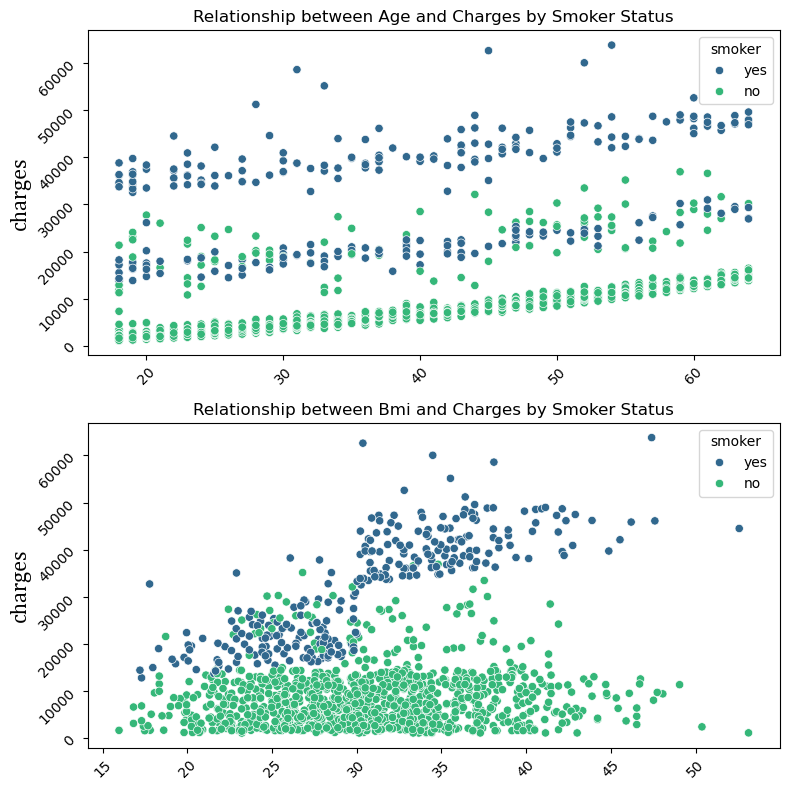

In [251]:
plt.figure(figsize=(8,8))
window=1
for i in df.drop(['sex','children','smoker','region','charges'],axis=1):
    plt.subplot(2,1,window)
    sns.scatterplot(x=i,y='charges',data=df,hue='smoker',palette='viridis')
    plt.xticks(fontsize=10,rotation =45)
    plt.yticks(fontsize=10,rotation =45)
    plt.xlabel('',fontsize=16,fontfamily='Cambria')
    plt.ylabel('charges',fontsize=16,fontfamily='Cambria')
    plt.title(f'Relationship between {i.capitalize()} and Charges by Smoker Status') 
    window+=1
plt.tight_layout()

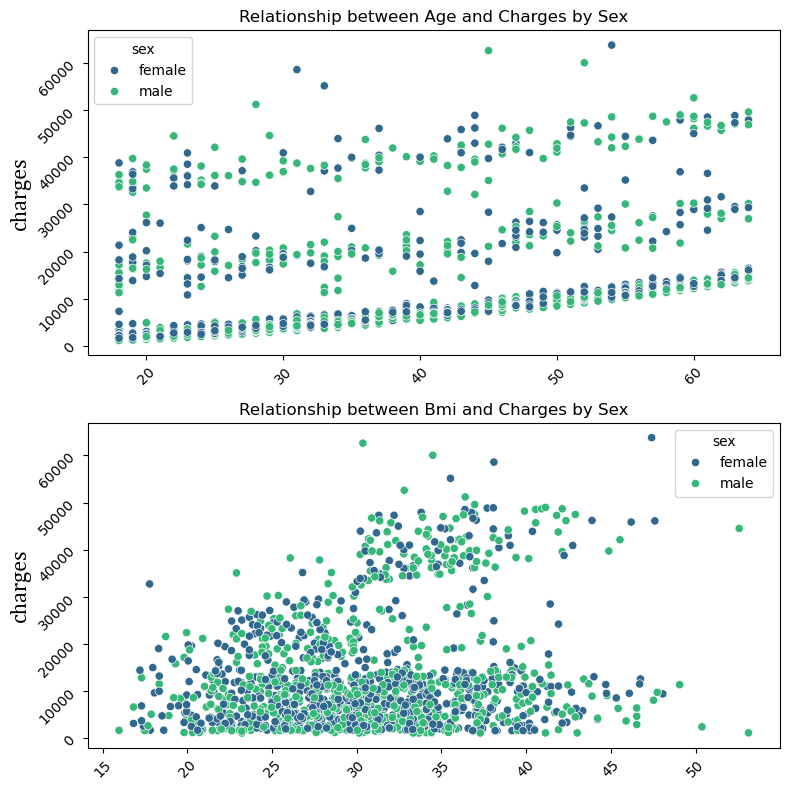

In [253]:
plt.figure(figsize=(8,8))
window=1
for i in df.drop(['sex','children','smoker','region','charges'],axis=1):
    plt.subplot(2,1,window)
    sns.scatterplot(x=i,y='charges',data=df,hue='sex',palette='viridis')
    plt.xticks(fontsize=10,rotation =45)
    plt.yticks(fontsize=10,rotation =45)
    plt.xlabel('',fontsize=16,fontfamily='Cambria')
    plt.ylabel('charges',fontsize=16,fontfamily='Cambria')
    plt.title(f'Relationship between {i.capitalize()} and Charges by Sex') 
    window+=1
plt.tight_layout()

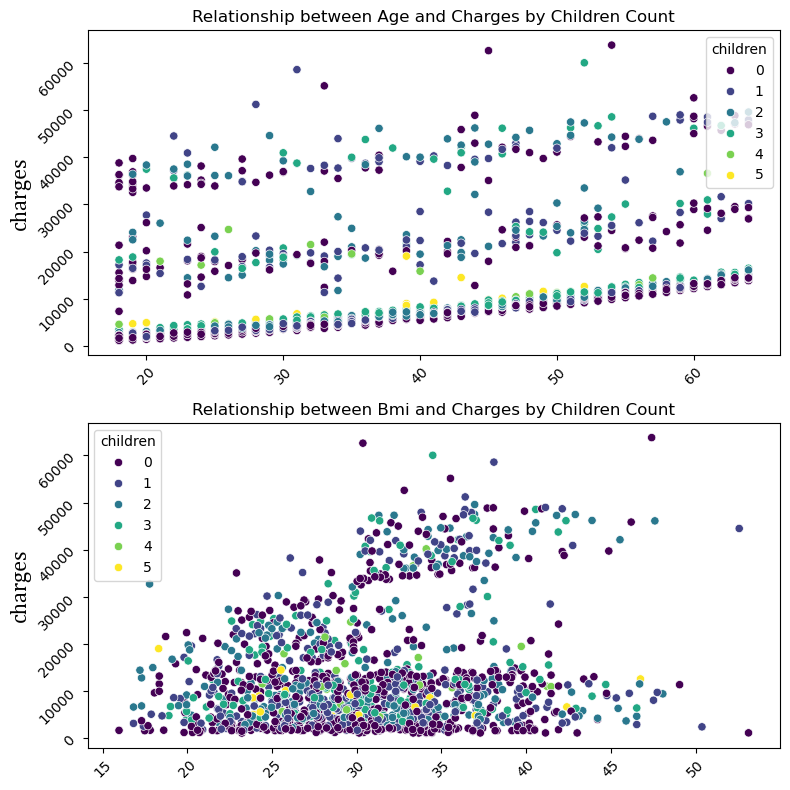

In [254]:
plt.figure(figsize=(8,8))
window=1
for i in df.drop(['sex','children','smoker','region','charges'],axis=1):
    plt.subplot(2,1,window)
    sns.scatterplot(x=i,y='charges',data=df,hue='children',palette='viridis')
    plt.xticks(fontsize=10,rotation =45)
    plt.yticks(fontsize=10,rotation =45)
    plt.xlabel('',fontsize=16,fontfamily='Cambria')
    plt.ylabel('charges',fontsize=16,fontfamily='Cambria')
    plt.title(f'Relationship between {i.capitalize()} and Charges by Children Count') 
    window+=1
plt.tight_layout()

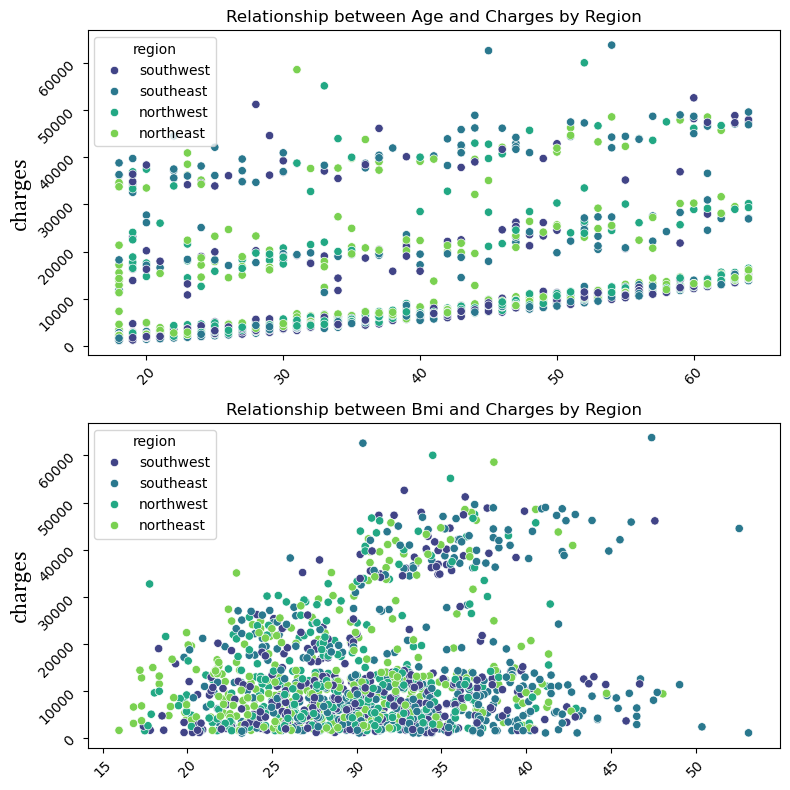

In [255]:
plt.figure(figsize=(8,8))
window=1
for i in df.drop(['sex','children','smoker','region','charges'],axis=1):
    plt.subplot(2,1,window)
    sns.scatterplot(x=i,y='charges',data=df,hue='region',palette='viridis')
    plt.xticks(fontsize=10,rotation =45)
    plt.yticks(fontsize=10,rotation =45)
    plt.xlabel('',fontsize=16,fontfamily='Cambria')
    plt.ylabel('charges',fontsize=16,fontfamily='Cambria')
    plt.title(f'Relationship between {i.capitalize()} and Charges by Region') 
    window+=1
plt.tight_layout()

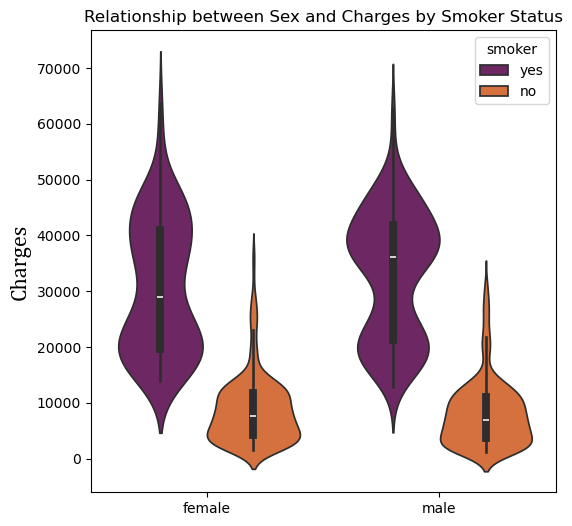

In [257]:
plt.figure(figsize=(6,6))
sns.violinplot(x = 'sex', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')
    
plt.xlabel('',fontsize=16,fontfamily='Cambria')
plt.ylabel('Charges',fontsize=16,fontfamily='Cambria')
plt.title(f'Relationship between Sex and Charges by Smoker Status') 
plt.show()

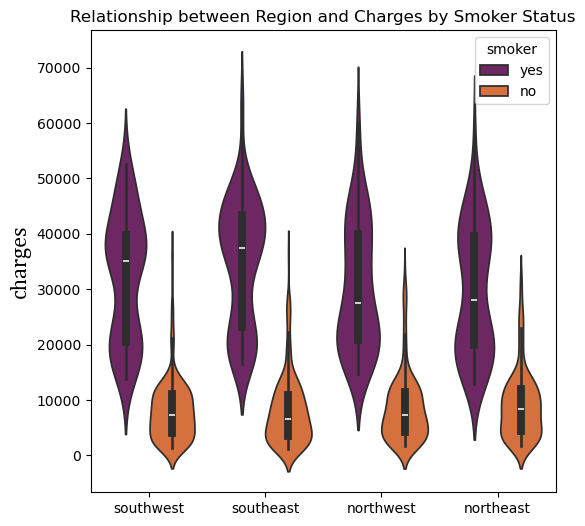

In [258]:
plt.figure(figsize=(6,6))
sns.violinplot(x = 'region', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')
    
plt.xlabel('',fontsize=16,fontfamily='Cambria')
plt.ylabel('charges',fontsize=16,fontfamily='Cambria')
plt.title(f'Relationship between Region and Charges by Smoker Status') 
plt.show()

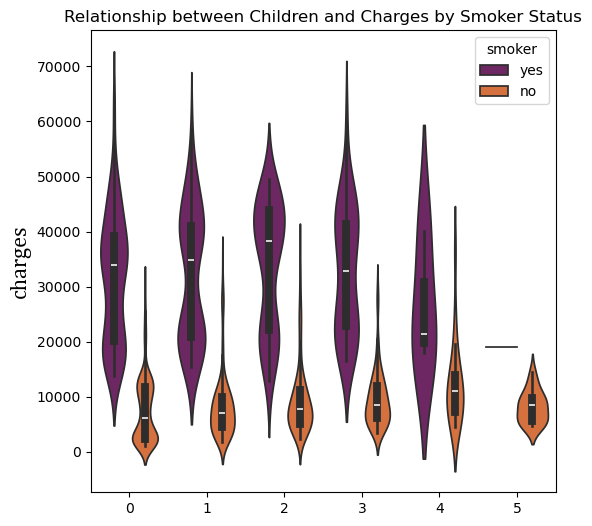

In [259]:
plt.figure(figsize=(6,6))
sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')
    
plt.xlabel('',fontsize=16,fontfamily='Cambria')
plt.ylabel('charges',fontsize=16,fontfamily='Cambria')
plt.title(f'Relationship between Children and Charges by Smoker Status') 
plt.show()

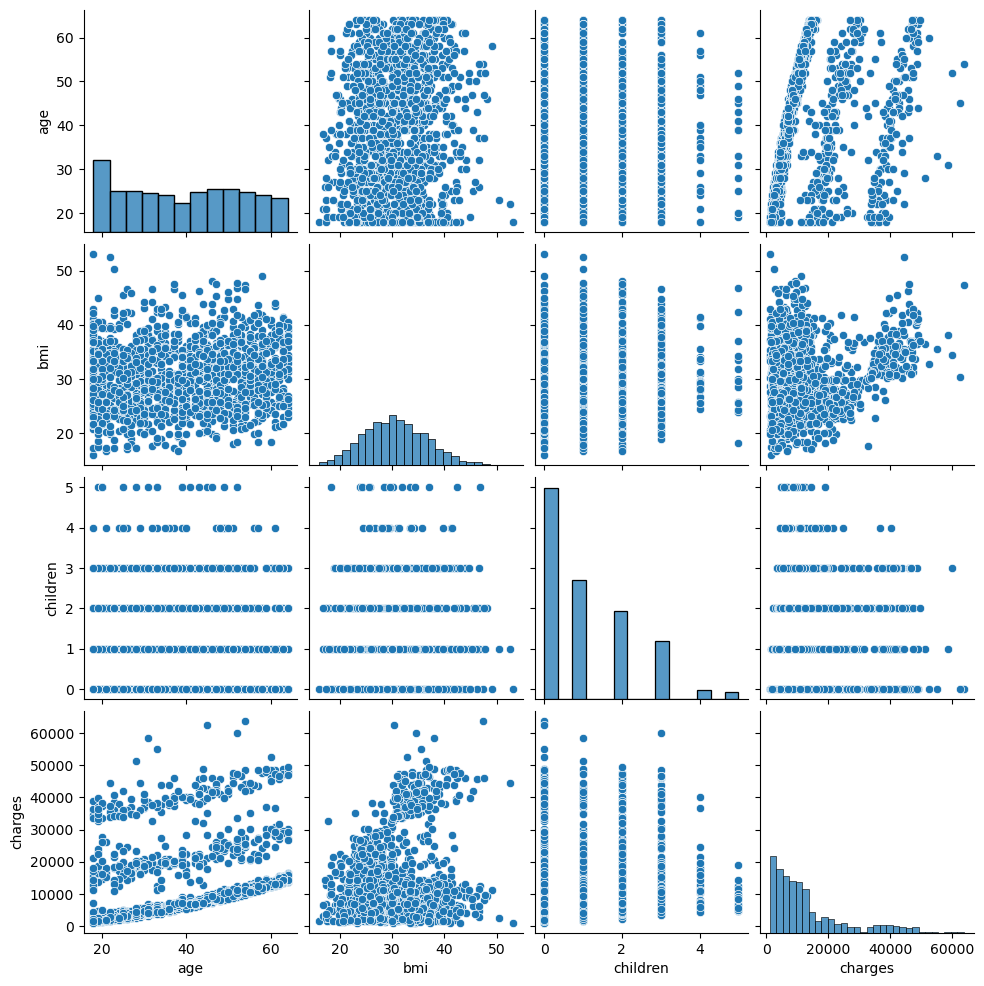

In [261]:
sns.pairplot(df)
plt.show()

## Insights from EDA
- **BMI** follows a nearly perfect **normal distribution**, while **charges** exhibit a **right-skewed distribution**.
- **Children** and **age** do not show any clear distribution pattern.
- The proportions of **sex** and **region** are approximately equal across the dataset.
- The **smoker** group constitutes about **20.5%** of the data, while **non-smokers** make up **79.5%**.
- **Age** demonstrates a relatively **linear relationship** with **charges**, while **BMI** and **children** show **no clear linearity with charges**.
- The average **insurance charges** in **sex** and **region** show no significant difference.
- The **charges** for **smokers** are approximately **three times higher** than those for **non-smokers**.
- Individuals who are **older**, **smoke**, and are **obese** tend to have higher **insurance charges**.
- **Children**, **sex**, and **region** do not have a significant impact on **charges**.


## Feature Engineering / Data Preprocessing

### Checking null values

In [269]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Checking Outliers

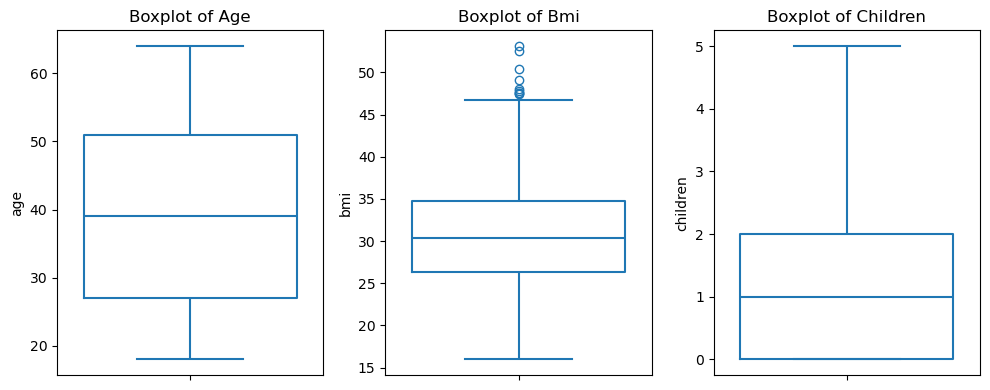

In [271]:
plt.figure(figsize=(10,4))
w=1
for i in only_numeric.columns.drop("charges"):
    plt.subplot(1,3,w)
    sns.boxplot(y=i, data=df,fill =False,)
    plt.title(f"Boxplot of {i.capitalize()}")
    w = w+1
plt.tight_layout()
    


In [272]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.7
47.290000000000006


In [273]:
df.loc[df["bmi"]<13.7,:]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

In [274]:
df.loc[df["bmi"]>47.29,:]

age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270

### Insights

- The **box plot** indicates that **BMI values** above **47.29** are **outliers**; however, in real-world scenarios, such BMI values are possible, and insurance companies would likely account for them when determining charges.
-  A higher **BMI** is associated with **higher charges**, and this relationship should be incorporated into the model, as BMI is one of the most significant factors contributing to predicting insurance charges.

### Duplicates

In [278]:
# occurrence based on all columns
duplicate = df[df.duplicated(keep=False)]
duplicate

age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631

### Insights

- Although the two data are similar, **they do not contain unique identifiers like names or IDs**, and since it's possible for records to have similar attributes, they should not be considered as duplicates.

### Transformation

In [284]:
eda_pipeline = ColumnTransformer(
    transformers=[
    ('Age scaling',MinMaxScaler(),['age']),
    ('BMI scaling', StandardScaler(),['bmi']),
    ('Categorical encoding' , OneHotEncoder(drop='first',dtype='int'),['sex','smoker','region'])],
        remainder = 'passthrough'
)

In [285]:
transformed_df = eda_pipeline.fit_transform(df)

In [286]:
column_names = ['age_scaled',  'bmi_scaled', 'sex_encoded', 'smoker_encoded', 'northwest','southeast','southwest', 'children','charges']

In [291]:
final_df = pd.DataFrame(transformed_df,columns=column_names)

In [296]:
final_df.head(5)

age_scaled  bmi_scaled  sex_encoded  smoker_encoded  northwest  southeast  \
0    0.021739   -0.453320          0.0             1.0        0.0        0.0   
1    0.000000    0.509621          1.0             0.0        0.0        1.0   
2    0.217391    0.383307          1.0             0.0        0.0        1.0   
3    0.326087   -1.305531          1.0             0.0        1.0        0.0   
4    0.304348   -0.292556          1.0             0.0        1.0        0.0   

   southwest  children      charges  
0        1.0       0.0  16884.92400  
1        0.0       1.0   1725.55230  
2        0.0       3.0   4449.46200  
3        0.0       0.0  21984.47061  
4        0.0       0.0   3866.85520

### Insights

- Since age does not exhibit a clear distribution, applying the **Min-Max scaler** would be appropriate to normalize its values.
- BMI, which shows a nearly normal distribution, would benefit from the **Standard Scaler** to standardize the data.
-  As for categorical variables like sex, smoker status, and region, since they are nominal without any hierarchical ranking, **One-Hot Encoding** is the most suitable method

## Feature Selection

In [302]:
correlation = final_df.corr()

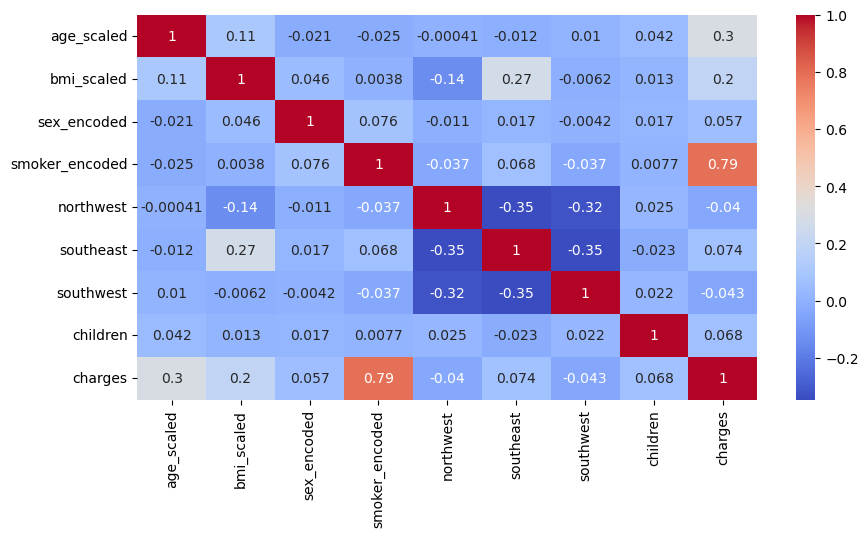

In [304]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

## Insights

- **Smoker status** shows a **strong correlation** with **insurance charges**, while **age and BMI** have a **weaker correlation**.
-  Other features, such as **region, children, and sex**, **do not exhibit any significant correlation with charges**.
-  However, since the dataset contains relatively few features, **none of the features should be eliminated from the model**.

## Data Splitting

In [309]:
x = final_df.drop(columns = 'charges')
y = final_df.charges

In [532]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=16)

In [534]:
print(x_train.shape, x_test.shape ,y_train.shape, y_test.shape)

(1070, 8) (268, 8) (1070,) (268,)


## Model Implementation and Model Evaluation

### Linear Regression

In [317]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [320]:
lr.score(x_test,y_test), lr.score(x_train,y_train)

(0.7075481627988487, 0.7604626634860677)

### Ridge Regression

In [403]:
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

### Model Evaluation

In [405]:
ridge.score(x_test,y_test), ridge.score(x_train,y_train)

(0.7077444279696701, 0.7604329856939134)

### Lasso Regression

In [329]:
lasso = Lasso()
lasso.fit(x_train,y_train)

Lasso()

### Model Evaluation

In [332]:
lasso.score(x_test,y_test), lasso.score(x_train,y_train)

(0.7076053396626883, 0.7604621556639721)

### Elasticnet Regression

In [335]:
elastic = ElasticNet()
elastic.fit(x_train,y_train)

ElasticNet()

### Model Evaluation

In [338]:
elastic.score(x_test,y_test), elastic.score(x_train,y_train)

(0.3190103186274601, 0.3394044589024249)

### Polynomial Linear Regression

In [341]:
poly_linear = make_pipeline(PolynomialFeatures(),LinearRegression())
poly_linear.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

### Model Evaluation

In [344]:
poly_linear.score(x_test,y_test), poly_linear.score(x_train,y_train)

(0.7954235873632948, 0.8582567222863835)

### Polynomial Ridge Regression

In [347]:
poly_ridge = make_pipeline(PolynomialFeatures(),Ridge())
poly_ridge.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

### Model Evaluation

In [350]:
poly_ridge.score(x_test,y_test), poly_ridge.score(x_train,y_train)

(0.7972204216091789, 0.858152034947626)

### Polynomial Lasso Regression

In [353]:
poly_lasso = make_pipeline(PolynomialFeatures(),Lasso())
poly_lasso.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso())])

### Model Evaluation

In [356]:
poly_lasso.score(x_test,y_test), poly_lasso.score(x_train,y_train)

(0.7959821130945841, 0.8582446404171875)

### Polynomial Elasticnet Regression

In [359]:
poly_elasticnet = make_pipeline(PolynomialFeatures(),ElasticNet())
poly_elasticnet.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('elasticnet', ElasticNet())])

### Model Evaluation

In [362]:
poly_elasticnet.score(x_test,y_test), poly_elasticnet.score(x_train,y_train)

(0.6088437227607291, 0.613985918161146)

### Support Vector Regression

In [365]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

### Model Evaluation

In [368]:
svr.score(x_test,y_test), svr.score(x_train,y_train)

(-0.08830675624507078, -0.10379995479544513)

### Decision Tree Regression

In [371]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor()

### Model Evaluation

In [374]:
decision_tree.score(x_test,y_test), decision_tree.score(x_train,y_train)

(0.7056249630324836, 0.9988520040058002)

### Random Forest Regression (Bagging)

In [377]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

### Model Evaluation

In [379]:
rf.score(x_test,y_test), rf.score(x_train,y_train) 

(0.7993157006735052, 0.9789144580981307)

### Gradient Boosting Regression

In [383]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

### Model Evaluation

In [386]:
gbr.score(x_test,y_test), gbr.score(x_train,y_train)

(0.8123169660898941, 0.9134354207515745)

### Extreme Boosting Regression (XGBOOSTRegression)

In [389]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

In [392]:
xgbr.score(x_test,y_test), xgbr.score(x_train, y_train)

(0.7762151169334853, 0.9964521868572677)

### Multi Layer Perceptron Regression

In [395]:
mlpr = MLPRegressor()
mlpr.fit(x_train,y_train)

MLPRegressor()

### Model Evaluation

In [398]:
mlpr.score(x_test,y_test),mlpr.score(x_train,y_train)

(-1.02968331505991, -1.0101636495861483)

## Insights

- **Linear, Ridge, and Lasso Regression, along with Linear, Ridge, and Lasso Polynomial Regression**, perform reasonably well.
- **ElasticNet and Elastic Polynomial Regression** perform poorly.
- **SVR and MLP** show extremely poor performance, with negative R² scores when using default parameters.
- **Hyperparameter tuning** is required for all models to improve performance.

## Hyperparameter Tuning

### Ridge Regression

In [410]:
r = Ridge()

params = {"alpha":[0.1,1,10],
         "solver":["cholesky","lsqr","sparse_cg","saga","svd"],
         "max_iter":[1000, 5000, 10000, 20000],
         "random_state":range(43)}

grid = GridSearchCV(estimator=r,
                    param_grid=params,
                    scoring="r2",
                    cv=5,
                    n_jobs=-1)
#grid.fit(x_train,y_train)

#grid.best_estimator_

Ridge(alpha=1, max_iter=1000, random_state=17, solver='saga')

### Lasso Regression

In [414]:
l = Lasso()

params = {"alpha":[0.001,0.01,0.1,1,10,100],
         "max_iter":[1000,5000,10000],
         "random_state":range(43)}

grid = GridSearchCV(estimator=l,
                   param_grid=params,
                   cv=5,
                   scoring="r2",
                   n_jobs=-1,
                   verbose=3)
#grid.fit(x_train,y_train)

#grid.best_estimator_

Fitting 5 folds for each of 774 candidates, totalling 3870 fits


Lasso(alpha=10, random_state=0)

### Elasticnet Regression

In [416]:
e = ElasticNet()

params = {"alpha":[0.01,0.1,1,10],
          "l1_ratio": [0.1, 0.5, 0.9],
          "max_iter":[1000,2000,3000],
          "random_state": range(43)}

grid = GridSearchCV(estimator=e,
                   param_grid=params,
                   scoring="r2",
                   cv=5,
                   n_jobs=-1,
                   verbose=3)
#grid.fit(x_train,y_train)

#grid.best_estimator_

Fitting 5 folds for each of 1548 candidates, totalling 7740 fits


ElasticNet(alpha=0.01, l1_ratio=0.9, random_state=0)

### Polynomial Ridge Regression

In [186]:
pipe = make_pipeline(PolynomialFeatures(),Ridge())

params = {"polynomialfeatures__degree":[1,2,3,4],
          "ridge__alpha":[0.01,0.1,1,10,100],
          "ridge__solver":["auto"],
          "ridge__max_iter":[100, 500, 1000, 2000],
          "ridge__random_state":range(43)}

grid = GridSearchCV(estimator=pipe,
                    param_grid=params,
                    cv=5,
                    scoring="r2",
                    n_jobs=-1,
                    verbose=3)
#grid.fit(x_train,y_train)

#grid.best_params_

Fitting 5 folds for each of 3440 candidates, totalling 17200 fits


{'polynomialfeatures__degree': 2,
 'ridge__alpha': 1,
 'ridge__max_iter': 100,
 'ridge__random_state': 0,
 'ridge__solver': 'auto'}

### Polynomial Lasso Regression

In [422]:
pipe = make_pipeline(PolynomialFeatures(),Lasso())

params = {"polynomialfeatures__degree":[1,2,3,4],
          "lasso__alpha":[0.001,0.01,0.1,1,10,100],
          "lasso__max_iter":[1000,1500,2000]}

grid = GridSearchCV(estimator=pipe,
                    param_grid=params,
                    cv=5,
                    scoring="r2",
                    n_jobs=-1,
                    verbose=3)
#grid.fit(x_train,y_train)

#grid.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'lasso__alpha': 100, 'lasso__max_iter': 1000, 'polynomialfeatures__degree': 4}

### Polynomial Elasticnet Regression

In [557]:
pipe = make_pipeline(PolynomialFeatures(),ElasticNet())

params = {"polynomialfeatures__degree":[1,2,3,4],
          "elasticnet__alpha":[0.001,0.01,0.1,1,10],
          "elasticnet__max_iter":[1000,1500,2000],
          "elasticnet__selection":["cyclic","random"],
          "elasticnet__l1_ratio":[0.2,0.5,0.7,1],
          "elasticnet__random_state":range(43)}

grid = GridSearchCV(estimator=pipe,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=3,
                    scoring="r2")
#grid.fit(x_train,y_train)

#grid.best_params_

### Support Vector Regression

In [555]:
s = SVR()

params = {  "kernel":['linear', 'poly', 'rbf'],
            "degree":[2,3],
            "gamma":[0.001,0.01,0.1,1],
            "coef0":[0.0,0.5,1],
            "C":[0.001,0.01,0.1,1,10,100],
            "epsilon":[0.001,0.01,0.1,0.5,1]}

grid  = GridSearchCV(estimator=s,
                     param_grid=params,
                     cv=5,
                     verbose= 3,
                     scoring= "r2",
                     n_jobs= -1)
#grid.fit(x_train,y_train)

#grid.best_estimator_ 

### Decision Tree Regression

In [550]:
d = DecisionTreeRegressor() 

params ={  'criterion':['squared_error','absolute_error'],
            'splitter':["best", "random"],
            'max_depth':(list(range(1,10))),
            'min_samples_split':(list(range(1,10))),
            'min_samples_leaf':(list(range(1,10))),
            'max_features':(list(range(1,9))),
            'max_leaf_nodes':(list(range(1,10)))}

grid = GridSearchCV(estimator=d,
                    param_grid=params,
                    cv=5,
                    verbose=2,
                    refit=True,
                    n_jobs=-1,
                    scoring='r2')
#grid.fit(x_train,y_train)

#grid.best_params_

### Random Forest Regresion

In [546]:
r = RandomForestRegressor()

params = {
    "n_estimators": [100, 300, 500],
    "criterion": ["squared_error", "absolute_error"],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "max_features": ["sqrt", "log2", None],
    "ccp_alpha": [0.0, 0.01, 0.1]}

grid = GridSearchCV(estimator=r,
                   param_grid=params,
                   cv=5,
                   scoring="r2",
                   verbose=3,
                   n_jobs= -1)
#grid.fit(x_train,y_train)

#grid.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


{'ccp_alpha': 0.01,
 'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

### Gradient Boosting Regression

In [536]:
g = GradientBoostingRegressor()

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'subsample': [0.8, 1.0]}

grid = GridSearchCV(estimator=g,
                    param_grid=params,
                    cv=5,
                    scoring="r2",
                    n_jobs=-1,
                    verbose= 3)
#grid.fit(x_train,y_train)

#grid.best_params_

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


{'learning_rate': 0.05,
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

### XGBR - Extreme Gradient Boosting Regression

In [540]:
X = XGBRegressor()

params= {
    'min_child_weight': [ 3, 5, 7, 10],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05,0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'colsample_bylevel':[0.6,0.8]}

grid = GridSearchCV(estimator=X,
                    param_grid=params,
                    cv=5,
                    scoring="r2",
                    verbose= 3,
                    n_jobs= -1)
#grid.fit(x_train,y_train)

#grid.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


{'colsample_bylevel': 0.8,
 'colsample_bytree': 1.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 1.0}

### Multi Layer Perceptron Regression

In [544]:
m = MLPRegressor(activation="relu",solver="adam",learning_rate="adaptive",early_stopping=True)

params = {       'hidden_layer_sizes': [(256, 128, 64), (128, 64, 32),(64, 32, 16)],  
                'learning_rate_init': [ 0.01, 0.1 ],
                'alpha': [ 0.001, 0.01 ],  
                'batch_size': [32 , 'auto'],  
                'max_iter': [200, 300],  
                'n_iter_no_change': [10, 15],
                'validation_fraction': [0.05, 0.1]}

grid  =GridSearchCV(estimator=m,
                    param_grid=params,
                    scoring="r2",
                    cv=5,
                    verbose=3,
                    n_jobs= -1)
#grid.fit(x_train,y_train)

#grid.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


MLPRegressor(alpha=0.001, batch_size=32, early_stopping=True,
             hidden_layer_sizes=(128, 64, 32), learning_rate='adaptive',
             learning_rate_init=0.1)

## ReTrain and ReEvaluation of the Models

### Linear Regression

In [430]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=11)

linear = LinearRegression()
linear.fit(x_train,y_train)

y_hat_linear = linear.predict(x_test)
y_hat_linear_train = linear.predict(x_train)

r2_linear = r2_score(y_test,y_hat_linear)
r2_linear_train = r2_score(y_train,y_hat_linear_train)
rmse_linear = root_mean_squared_error(y_test,y_hat_linear)
mae_linear = mean_absolute_error(y_test,y_hat_linear)

In [432]:
r2_linear , r2_linear_train,rmse_linear,mae_linear

(0.7996633930323261, 0.7390019992731405, 5270.792169020382, 3804.198416541936)

### Ridge Regression

In [435]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=11)

ridge = Ridge(max_iter=1000,alpha=1,random_state=17,solver='saga')
ridge.fit(x_train,y_train)

y_hat_ridge = ridge.predict(x_test)
y_hat_ridge_train = ridge.predict(x_train)

r2_ridge = r2_score(y_test,y_hat_ridge)
r2_ridge_train = r2_score(y_train,y_hat_ridge_train)
rmse_ridge = root_mean_squared_error(y_test,y_hat_ridge)
mae_ridge = mean_absolute_error(y_test,y_hat_ridge)

In [437]:
r2_ridge, r2_ridge_train, rmse_ridge, mae_ridge 

(0.7994755680129213, 0.7389720996468419, 5273.262398314275, 3815.572593223896)

### Lasso Regression

In [440]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=11)

lasso = Lasso(alpha =10,random_state=0)
lasso.fit(x_train,y_train)

y_hat_lasso = lasso.predict(x_test)
y_hat_lasso_train = lasso.predict(x_train)

r2_lasso = r2_score(y_test,y_hat_lasso)
r2_lasso_train = r2_score(y_train,y_hat_lasso_train)
rmse_lasso = root_mean_squared_error(y_test,y_hat_lasso)
mae_lasso = mean_absolute_error(y_test,y_hat_lasso)

In [442]:
r2_lasso, r2_lasso_train, rmse_lasso, mae_lasso

(0.8000671016631906, 0.7389507545869849, 5265.478768249301, 3805.939579191491)

### Elasticnet Regression

In [444]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=11)

elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.9, random_state=0)
elasticnet.fit(x_train,y_train)

y_hat_elasticnet = elasticnet.predict(x_test)
y_hat_elasticnet_train = elasticnet.predict(x_train)

r2_elasticnet = r2_score(y_test,y_hat_elasticnet)
r2_elasticnet_train = r2_score(y_train,y_hat_elasticnet_train)
rmse_elasticnet = root_mean_squared_error(y_test,y_hat_elasticnet)
mae_elasticnet = mean_absolute_error(y_test,y_hat_elasticnet)

In [446]:
r2_elasticnet, r2_elasticnet_train, rmse_elasticnet, mae_elasticnet

(0.7994641776881554, 0.7389676910951564, 5273.412163900868, 3816.2876183955755)

### Polynomial Linear Regression

In [449]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=13)

poly_linear = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
poly_linear.fit(x_train,y_train)

y_hat_poly_linear = poly_linear.predict(x_test)
y_hat_poly_linear_train = poly_linear.predict(x_train)

r2_poly_linear = r2_score(y_test,y_hat_poly_linear)
r2_poly_linear_train = r2_score(y_train,y_hat_poly_linear_train)
rmse_poly_linear = root_mean_squared_error(y_test,y_hat_poly_linear)
mae_poly_linear = mean_absolute_error(y_test,y_hat_poly_linear)

In [451]:
r2_poly_linear, r2_poly_linear_train, rmse_poly_linear, mae_poly_linear

(0.8947495301056575, 0.8349042144122, 3867.8274598552557, 2553.492611227574)

### Polynomial Ridge Regression

In [454]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=13)

poly_ridge = make_pipeline(PolynomialFeatures(degree=2),Ridge(alpha=1,max_iter=100,random_state=0,solver='auto'))
poly_ridge.fit(x_train,y_train)

y_hat_poly_ridge = poly_ridge.predict(x_test)
y_hat_poly_ridge_train = poly_ridge.predict(x_train)

r2_poly_ridge = r2_score(y_test,y_hat_poly_ridge)
r2_poly_ridge_train = r2_score(y_train,y_hat_poly_ridge_train)
rmse_poly_ridge = root_mean_squared_error(y_test,y_hat_poly_ridge)
mae_poly_ridge = mean_absolute_error(y_test,y_hat_poly_ridge)

In [456]:
r2_poly_ridge, r2_poly_ridge_train, rmse_poly_ridge, mae_poly_ridge

(0.8951558062678638, 0.8347949011527916, 3860.355163181892, 2561.1221178150467)

### Polynomial Lasso Regression

In [459]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=13)

poly_lasso = make_pipeline(PolynomialFeatures(degree=4),Lasso(alpha=100,max_iter=1000,random_state=1))
poly_lasso.fit(x_train,y_train)
y_hat_poly_lasso  = poly_lasso.predict(x_test)
y_hat_poly_lasso_train = poly_lasso.predict(x_train)

r2_poly_lasso = r2_score(y_test,y_hat_poly_lasso)
r2_poly_lasso_train = r2_score(y_train,y_hat_poly_lasso_train)
rmse_poly_lasso = root_mean_squared_error(y_test,y_hat_poly_lasso)
mae_poly_lasso = mean_absolute_error(y_test,y_hat_poly_lasso)

In [461]:
r2_poly_lasso, r2_poly_lasso_train, rmse_poly_lasso, mae_poly_lasso

(0.8958018464185595, 0.836214596357252, 3848.443210368289, 2626.23007722761)

### Polynomial Elasticnet Regression

In [464]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=13)

poly_elasticnet = make_pipeline(PolynomialFeatures(degree=2),ElasticNet(alpha=1,l1_ratio=1,max_iter=1000,random_state=16,selection='random'))
poly_elasticnet.fit(x_train,y_train)

y_hat_poly_elasticnet = poly_elasticnet.predict(x_test)
y_hat_poly_elasticnet_train = poly_elasticnet.predict(x_train)

r2_poly_elasticnet = r2_score(y_test,y_hat_poly_elasticnet)
r2_poly_elasticnet_train = r2_score(y_train,y_hat_poly_elasticnet_train)
rmse_poly_elasticnet = root_mean_squared_error(y_test,y_hat_poly_elasticnet)
mae_poly_elasticnet = mean_absolute_error(y_test,y_hat_poly_elasticnet)

In [466]:
r2_poly_elasticnet, r2_poly_elasticnet_train, rmse_poly_elasticnet, mae_poly_elasticnet

(0.8950099689127902,
 0.8348883732762316,
 3863.0390902846007,
 2552.4425500557895)

### Support Vector Regression

In [469]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=13)

svr = SVR(C= 100, coef0=1,epsilon=0.01, degree = 3,gamma=1, kernel= 'poly')
svr.fit(x_train,y_train)

y_hat_svr = svr.predict(x_test)
y_hat_svr_train = svr.predict(x_train)

r2_svr = r2_score(y_test,y_hat_svr)
r2_svr_train = r2_score(y_train,y_hat_svr_train)
rmse_svr = root_mean_squared_error(y_test,y_hat_svr)
mae_svr = mean_absolute_error(y_test,y_hat_svr)

In [470]:
r2_svr, r2_svr_train, rmse_svr, mae_svr

(0.889799107567481, 0.8101341065136087, 3957.7433371091124, 1523.8087005168848)

### Decision Tree Regression

In [474]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=13)

decision_tree = DecisionTreeRegressor(criterion= 'squared_error',
                                      random_state =40, 
                                      max_depth= 4,
                                      max_features= 7,
                                      max_leaf_nodes= 9,
                                      min_samples_leaf= 5,
                                      min_samples_split= 5,
                                      splitter= 'best')
decision_tree.fit(x_train,y_train)

y_hat_decision_tree = decision_tree.predict(x_test)
y_hat_decision_tree_train = decision_tree.predict(x_train)

r2_decision_tree = r2_score(y_test,y_hat_decision_tree)
r2_decision_tree_train = r2_score(y_train,y_hat_decision_tree_train)
rmse_decision_tree = root_mean_squared_error(y_test,y_hat_decision_tree)
mae_decision_tree = mean_absolute_error(y_test,y_hat_decision_tree)

In [476]:
r2_decision_tree, r2_decision_tree_train, rmse_decision_tree, mae_decision_tree

(0.9111381233490827,
 0.8444984477031119,
 3553.9622548596194,
 2306.5882076389307)

### Random Forest Regresion (Bagging)

In [478]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

rf = RandomForestRegressor(ccp_alpha =  0.0,
                                     criterion =  "absolute_error",
                                     max_depth = 10,
                                     max_features =  None,
                                     min_samples_leaf =  5,
                                     min_samples_split =  2,
                                     n_estimators =  500,
                                      random_state=2)
rf.fit(x_train,y_train)

y_hat_rf = rf.predict(x_test)
y_hat_rf_train = rf.predict(x_train)

r2_rf = r2_score(y_test,y_hat_rf)
r2_rf_train = r2_score(y_train,y_hat_rf_train)
rmse_rf = root_mean_squared_error(y_test,y_hat_rf)                         
mae_rf = mean_absolute_error(y_test,y_hat_rf)

In [479]:
r2_rf, r2_rf_train, rmse_rf, mae_rf

(0.9249028539203089,
 0.8662089974992442,
 3267.1327950668556,
 1311.6971891499104)

### Gradient Boosting Regression

In [483]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

gbr = GradientBoostingRegressor(learning_rate = 0.05,
                                    max_depth = 3,
                                    max_features = None,
                                    min_samples_leaf = 3,
                                    min_samples_split = 2,
                                    n_estimators = 100,
                                    subsample = 0.8,
                                    random_state=32)
gbr.fit(x_train,y_train)
y_hat_gbr = gbr.predict(x_test)
y_hat_gbr_train = gbr.predict(x_train)

r2_gbr = r2_score(y_test,y_hat_gbr)
r2_gbr_train = r2_score(y_train,y_hat_gbr_train)
rmse_gbr = root_mean_squared_error(y_test,y_hat_gbr)                                    
mae_gbr = mean_absolute_error(y_test,y_hat_gbr)

In [485]:
r2_gbr, r2_gbr_train, rmse_gbr, mae_gbr

(0.9264142694831572, 0.872353522065613, 3234.08830190047, 1930.5718357162316)

### Extreme Gradient Boosting Regression

In [488]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

xgbr = XGBRegressor( colsample_bylevel = 0.8,
                         colsample_bytree = 1.0,
                         learning_rate = 0.05,
                         max_depth = 3,
                         min_child_weight = 10,
                         n_estimators = 100,
                         subsample = 0.8,
                         random_state = 10)
xgbr.fit(x_train,y_train)

y_hat_xgbr = xgbr.predict(x_test)
y_hat_xgbr_train = xgbr.predict(x_train)

r2_xgbr = r2_score(y_test,y_hat_xgbr)
r2_xgbr_train = r2_score(y_train,y_hat_xgbr_train)
rmse_xgbr = root_mean_squared_error(y_test,y_hat_xgbr)                                    
mae_xgbr = mean_absolute_error(y_test,y_hat_xgbr)

In [490]:
r2_xgbr, r2_xgbr_train, rmse_xgbr, mae_xgbr

(0.9251518668607172,
 0.8679456309683682,
 3261.7115911867354,
 1965.7419868286495)

### Multi Layer Perceptron Regression (Neural Networks)

In [492]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

mlpr = MLPRegressor(alpha=0.001,
                        batch_size=32,
                        early_stopping=True,
                        hidden_layer_sizes=(128, 64, 32),
                        learning_rate='adaptive',
                        learning_rate_init=0.1,
                        n_iter_no_change=15,
                        random_state=11)
mlpr.fit(x_train,y_train)

y_hat_mlpr = mlpr.predict(x_test)
y_hat_mlpr_train = mlpr.predict(x_train)

r2_mlpr = r2_score(y_test,y_hat_mlpr)
r2_mlpr_train = r2_score(y_train,y_hat_mlpr_train)
rmse_mlpr = root_mean_squared_error(y_test,y_hat_mlpr)                                    
mae_mlpr = mean_absolute_error(y_test,y_hat_mlpr)

In [493]:
r2_mlpr, r2_mlpr_train, rmse_mlpr, mae_mlpr

(0.9167446246889726, 0.8335008436644256, 3440.021937384364, 2113.0472116934025)

### Insights of R² Scores Before and After Hyperparameter Tuning:

1. **Linear Regression** 
   - Before tuning: 0.7075  
   - After tuning: 0.7997  
   - Percentage increase: 12.98%

2. **Ridge**  
   - Before tuning: 0.7077  
   - After tuning: 0.7995  
   - Percentage increase: 12.99%

3. **Lasso**  
   - Before tuning: 0.7076  
   - After tuning: 0.8001  
   - Percentage increase: 13.06%

4. **ElasticNet**  
   - Before tuning: 0.3190  
   - After tuning: 0.7995  
   - Percentage increase: 150.47%

5. **Linear Polynomial**  
   - Before tuning: 0.7954  
   - After tuning: 0.8947  
   - Percentage increase: 12.47%

6. **Ridge Polynomial**  
   - Before tuning: 0.7972  
   - After tuning: 0.8952  
   - Percentage increase: 12.31%

7. **Lasso Polynomial**  
   - Before tuning: 0.7960  
   - After tuning: 0.8958  
   - Percentage increase: 12.58%

8. **ElasticNet Polynomial**  
   - Before tuning: 0.6088  
   - After tuning: 0.8950  
   - Percentage increase: 47.11%

9. **SVR**  
   - Before tuning: -0.0883  
   - After tuning: 0.8898  
   - Percentage increase: 1108.6% (dramatic improvement from negative to positive)

10. **Decision Tree**  
    - Before tuning: 0.6976  
    - After tuning: 0.9111  
    - Percentage increase: 30.55%

11. **Random Forest**  
    - Before tuning: 0.7957  
    - After tuning: 0.9249  
    - Percentage increase: 16.26%

12. **Gradient Boosting**  
    - Before tuning: 0.8138  
    - After tuning: 0.9264  
    - Percentage increase: 13.81%

13. **XGBoost**  
    - Before tuning: 0.7762  
    - After tuning: 0.9252  
    - Percentage increase: 19.22%

14. **MLP**  
    - Before tuning: -1.0323  
    - After tuning: 0.9167  
    - Percentage increase: 188.87% (large improvement)


## Model Evaluation & Comparison

In [498]:
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Linear Polynomial', 'Ridge Polynomial', 'Lasso Polynomial',
               'ElasticNet Polynomial', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

R2_test = [r2_linear, r2_ridge, r2_lasso, r2_elasticnet, r2_poly_linear, r2_poly_ridge, r2_poly_lasso, r2_poly_elasticnet,
            r2_svr, r2_decision_tree, r2_rf, r2_gbr, r2_xgbr, r2_mlpr]

R2_train = [r2_linear_train, r2_ridge_train, r2_lasso_train, r2_elasticnet_train, r2_poly_linear_train, r2_poly_ridge_train,
            r2_poly_lasso_train, r2_poly_elasticnet_train,r2_svr_train, r2_decision_tree_train, r2_rf_train, r2_gbr_train, 
            r2_xgbr_train, r2_mlpr_train]

y_pred = [y_hat_linear, y_hat_ridge, y_hat_lasso, y_hat_elasticnet, y_hat_poly_linear, y_hat_poly_ridge, y_hat_poly_lasso,
          y_hat_poly_elasticnet, y_hat_svr, y_hat_decision_tree, y_hat_rf, y_hat_gbr, y_hat_xgbr, y_hat_mlpr]

RMSE = [rmse_linear, rmse_ridge, rmse_lasso, rmse_elasticnet, rmse_poly_linear, rmse_poly_ridge, rmse_poly_lasso, rmse_poly_elasticnet,
        rmse_svr, rmse_decision_tree, rmse_rf, rmse_gbr, rmse_xgbr, rmse_mlpr]

MAE = [mae_linear, mae_ridge, mae_lasso, mae_elasticnet, mae_poly_linear, mae_poly_ridge, mae_poly_lasso, mae_poly_elasticnet, mae_svr,
      mae_decision_tree, mae_rf, mae_gbr, mae_xgbr, mae_mlpr]



In [500]:
model_scores = pd.DataFrame({"Model":model_names,
                             "R2_test":R2_test,
                             "R2_train":R2_train,
                             "RMSE":RMSE,
                             "MAE":MAE})

## Model Comparison Report

In [503]:
model_scores

Model   R2_test  R2_train         RMSE          MAE
0       Linear Regression  0.799663  0.739002  5270.792169  3804.198417
1                   Ridge  0.799476  0.738972  5273.262398  3815.572593
2                   Lasso  0.800067  0.738951  5265.478768  3805.939579
3              ElasticNet  0.799464  0.738968  5273.412164  3816.287618
4       Linear Polynomial  0.894750  0.834904  3867.827460  2553.492611
5        Ridge Polynomial  0.895156  0.834795  3860.355163  2561.122118
6        Lasso Polynomial  0.895802  0.836215  3848.443210  2626.230077
7   ElasticNet Polynomial  0.895010  0.834888  3863.039090  2552.442550
8                     SVR  0.889799  0.810134  3957.743337  1523.808701
9           Decision Tree  0.911138  0.844498  3553.962255  2306.588208
10          Random Forest  0.924903  0.866209  3267.132795  1311.697189
11      Gradient Boosting  0.926414  0.872354  3234.088302  1930.571836
12                XGBoost  0.925152  0.867946  3261.711591  1965.741987
13                    MLP  0.916745  0.833501  3440.021937  2113.047212

### Model Performance Overview by scores

1. **Linear Regression**
   - **R² Test**: 0.7997
   - **R² Train**: 0.7390
   - **RMSE**: 5270.79
   - **MAE**: 3804.20
   - **Insights**: The linear regression model has a decent performance on the test data with a moderate R² score. Its MAE and RMSE are on the higher side, indicating the model has some error in its predictions but still captures the relationship.

2. **Ridge Regression**
   - **R² Test**: 0.7995
   - **R² Train**: 0.7390
   - **RMSE**: 5273.18
   - **MAE**: 3815.25
   - **Insights**: Ridge regression shows similar performance to linear regression. It helps reduce overfitting with regularization but does not significantly improve the model compared to linear regression.

3. **Lasso Regression**
   - **R² Test**: 0.8001
   - **R² Train**: 0.7390
   - **RMSE**: 5265.48
   - **MAE**: 3805.94
   - **Insights**: Lasso regression shows the best performance among the linear models. Its R² score is slightly higher, and the RMSE and MAE are lower, indicating better accuracy in predictions. The Lasso model is beneficial for feature selection due to its L1 regularization.

4. **ElasticNet**
   - **R² Test**: 0.7995
   - **R² Train**: 0.7390
   - **RMSE**: 5273.41
   - **MAE**: 3816.29
   - **Insights**: ElasticNet, which combines L1 and L2 regularization, performs similarly to Ridge and Lasso. However, it does not significantly improve the performance compared to the simpler models.

5. **Linear Polynomial**
   - **R² Test**: 0.8948
   - **R² Train**: 0.8349
   - **RMSE**: 3867.83
   - **MAE**: 2553.49
   - **Insights**: Adding polynomial features significantly improves the model’s R² score, capturing more complex relationships. The RMSE and MAE are much lower, indicating a better fit. This model shows the benefit of adding non-linear features.

6. **Ridge Polynomial**
   - **R² Test**: 0.8952
   - **R² Train**: 0.8348
   - **RMSE**: 3860.36
   - **MAE**: 2561.12
   - **Insights**: Ridge regression with polynomial features also improves performance compared to the linear Ridge model. The inclusion of polynomial features helps the model capture more intricate patterns in the data.

7. **Lasso Polynomial**
   - **R² Test**: 0.8958
   - **R² Train**: 0.8362
   - **RMSE**: 3848.44
   - **MAE**: 2626.23
   - **Insights**: Lasso with polynomial features shows the best performance in terms of R² and RMSE among the polynomial models. The slight improvement over Ridge polynomial suggests that Lasso’s feature selection benefits the model.

8. **ElasticNet Polynomial**
   - **R² Test**: 0.8950
   - **R² Train**: 0.8349
   - **RMSE**: 3863.04
   - **MAE**: 2552.44
   - **Insights**: ElasticNet polynomial performs similarly to Ridge and Lasso polynomial models but is not as effective in terms of R², showing that the regularization approach of ElasticNet does not significantly benefit the polynomial features in this case.

9. **SVR (Support Vector Regression)**
   - **R² Test**: 0.8898
   - **R² Train**: 0.8101
   - **RMSE**: 3957.74
   - **MAE**: 1523.81
   - **Insights**: SVR performed well on the training data, but its performance on the test data is a bit lower than the polynomial models. The RMSE and MAE are also higher, indicating that this model struggles more with unseen data compared to polynomial regression models.

10. **Decision Tree**
    - **R² Test**: 0.9111
    - **R² Train**: 0.8445
    - **RMSE**: 3553.96
    - **MAE**: 2306.59
    - **Insights**: Decision Trees performed well with a high R² score, indicating they capture a lot of variance in the data. However, they have a tendency to overfit, as seen in the difference between the training and testing R² scores.

11. **Random Forest**
    - **R² Test**: 0.9249
    - **R² Train**: 0.8662
    - **RMSE**: 3267.13
    - **MAE**: 1311.70
    - **Insights**: Random Forest outperforms most models, showing the highest R² score and the lowest RMSE and MAE. It is a robust model for this task, capturing complex patterns and generalizing well to the test data.

12. **Gradient Boosting**
    - **R² Test**: 0.9264
    - **R² Train**: 0.8724
    - **RMSE**: 3234.09
    - **MAE**: 1930.57
    - **Insights**: Gradient Boosting also performs very well, with slightly better performance than Random Forest in terms of R² score and RMSE. It’s highly effective in capturing non-linear relationships and making accurate predictions.

13. **XGBoost**
    - **R² Test**: 0.9252
    - **R² Train**: 0.8680
    - **RMSE**: 3261.71
    - **MAE**: 1965.74
    - **Insights**: XGBoost performs similarly to Gradient Boosting. It’s a powerful model but doesn’t show a substantial improvement over Gradient Boosting for this particular task.

14. **MLP (Multilayer Perceptron)**
    - **R² Test**: 0.9167
    - **R² Train**: 0.8335
    - **RMSE**: 3440.02
    - **MAE**: 2113.05
    - **Insights**: MLP performed well compared to other models but showed higher RMSE and MAE. This suggests that MLP struggles with some patterns in the data, especially when compared to tree-based models like Random Forest and Gradient Boosting.


### Model Performance Summary

- **Best performing models**: 
   - **Random Forest**, **Gradient Boosting**, and **XGBoost** are the top models based on **R², RMSE, and MAE**. These models demonstrate robustness and high accuracy, making them the best choice for predicting insurance charges.

- **Polynomial models**:
   - Adding polynomial features significantly improves model performance in models like **Linear**, **Ridge**, and **Lasso**. The inclusion of higher-order terms helps capture non-linear relationships in the data, resulting in better predictive accuracy.

- **SVR and MLP**:
   - While **SVR** and **MLP** performed well on the training data, they did not generalize as effectively on the test data. 

- **Tree-based models**:
   - **Decision Tree** and **Random Forest** performed well, with **Random Forest** slightly outperforming **Gradient Boosting** in terms of **MAE** and **RMSE**. Tree-based models like Random Forest are highly effective in capturing complex patterns in the data.


## Model Comparison Plots

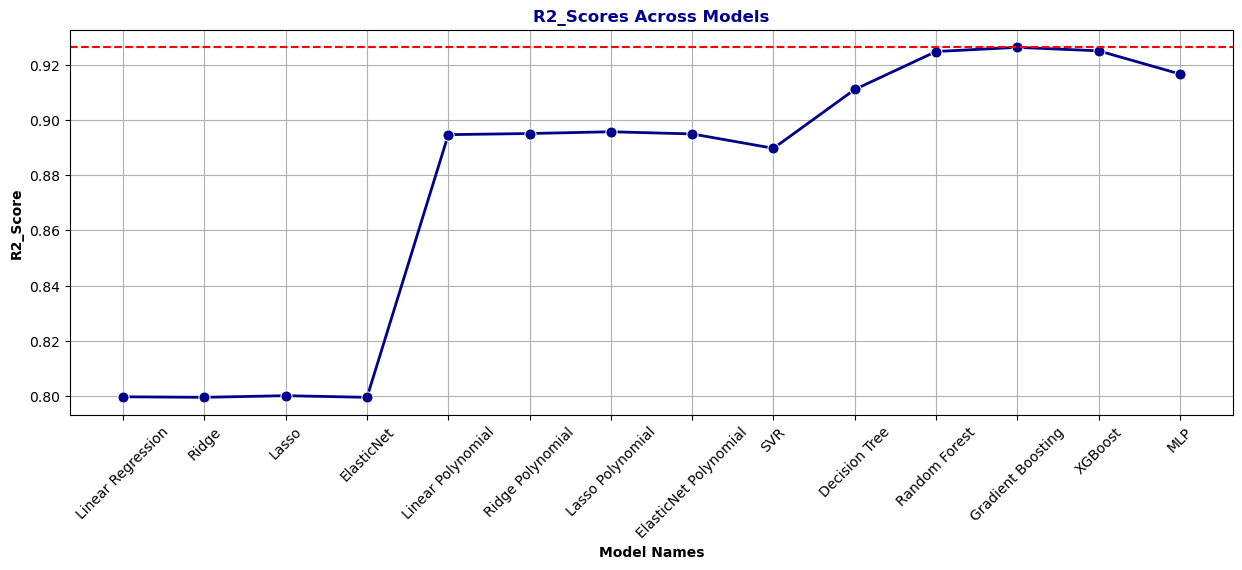

In [508]:
plt.figure(figsize=(15,5))
sns.lineplot(x=model_names, y=R2_test, marker='o',color = 'darkblue', markersize=8, linewidth=2)
max_r2 = max(R2_test)
plt.axhline(y=max_r2, color='red', linestyle='--')
plt.title("R2_Scores Across Models", color = 'darkblue',fontweight='bold')
plt.grid()
plt.xlabel('Model Names' ,fontweight='bold')
plt.ylabel('R2_Score' ,fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

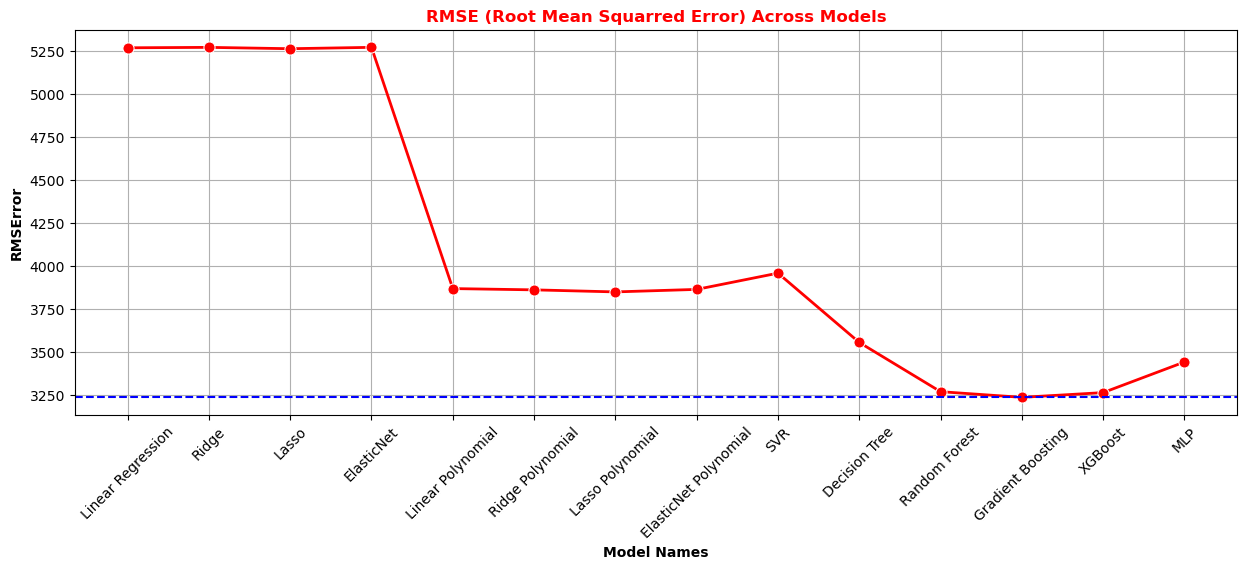

In [510]:
plt.figure(figsize=(15,5))
sns.lineplot(x = model_names, y = RMSE, marker='o',color = 'r', markersize=8, linewidth=2)
min_rmse = min(RMSE)
plt.axhline(y=min_rmse, color='b', linestyle='--')
plt.title("RMSE (Root Mean Squarred Error) Across Models", color='r',fontweight='bold')
plt.grid(which='major')
plt.xlabel('Model Names' ,fontweight='bold')
plt.ylabel('RMSError' ,fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

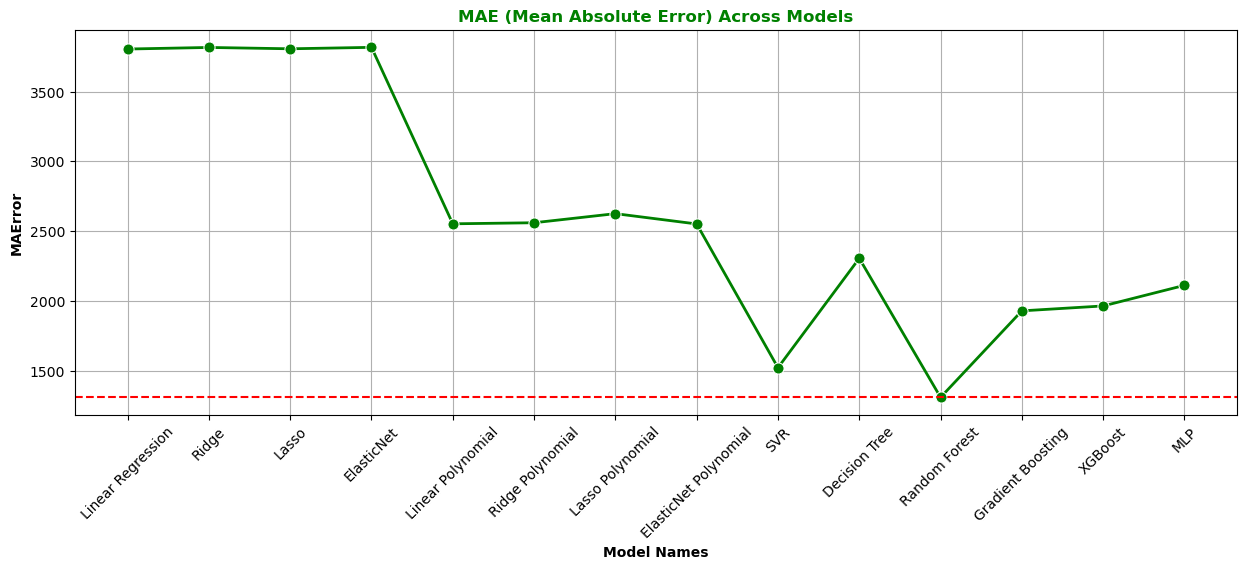

In [512]:
plt.figure(figsize=(15,5))
sns.lineplot(x = model_names, y = MAE, color = 'green', marker='o', markersize=8, linewidth=2)
min_mae = min(MAE)
plt.axhline(y=min_mae, color='red', linestyle='--')
plt.title("MAE (Mean Absolute Error) Across Models",color = 'green',fontweight='bold')
plt.grid()
plt.xticks(rotation = 45)
plt.xlabel('Model Names' ,fontweight='bold')
plt.ylabel('MAError' ,fontweight='bold')
plt.show()

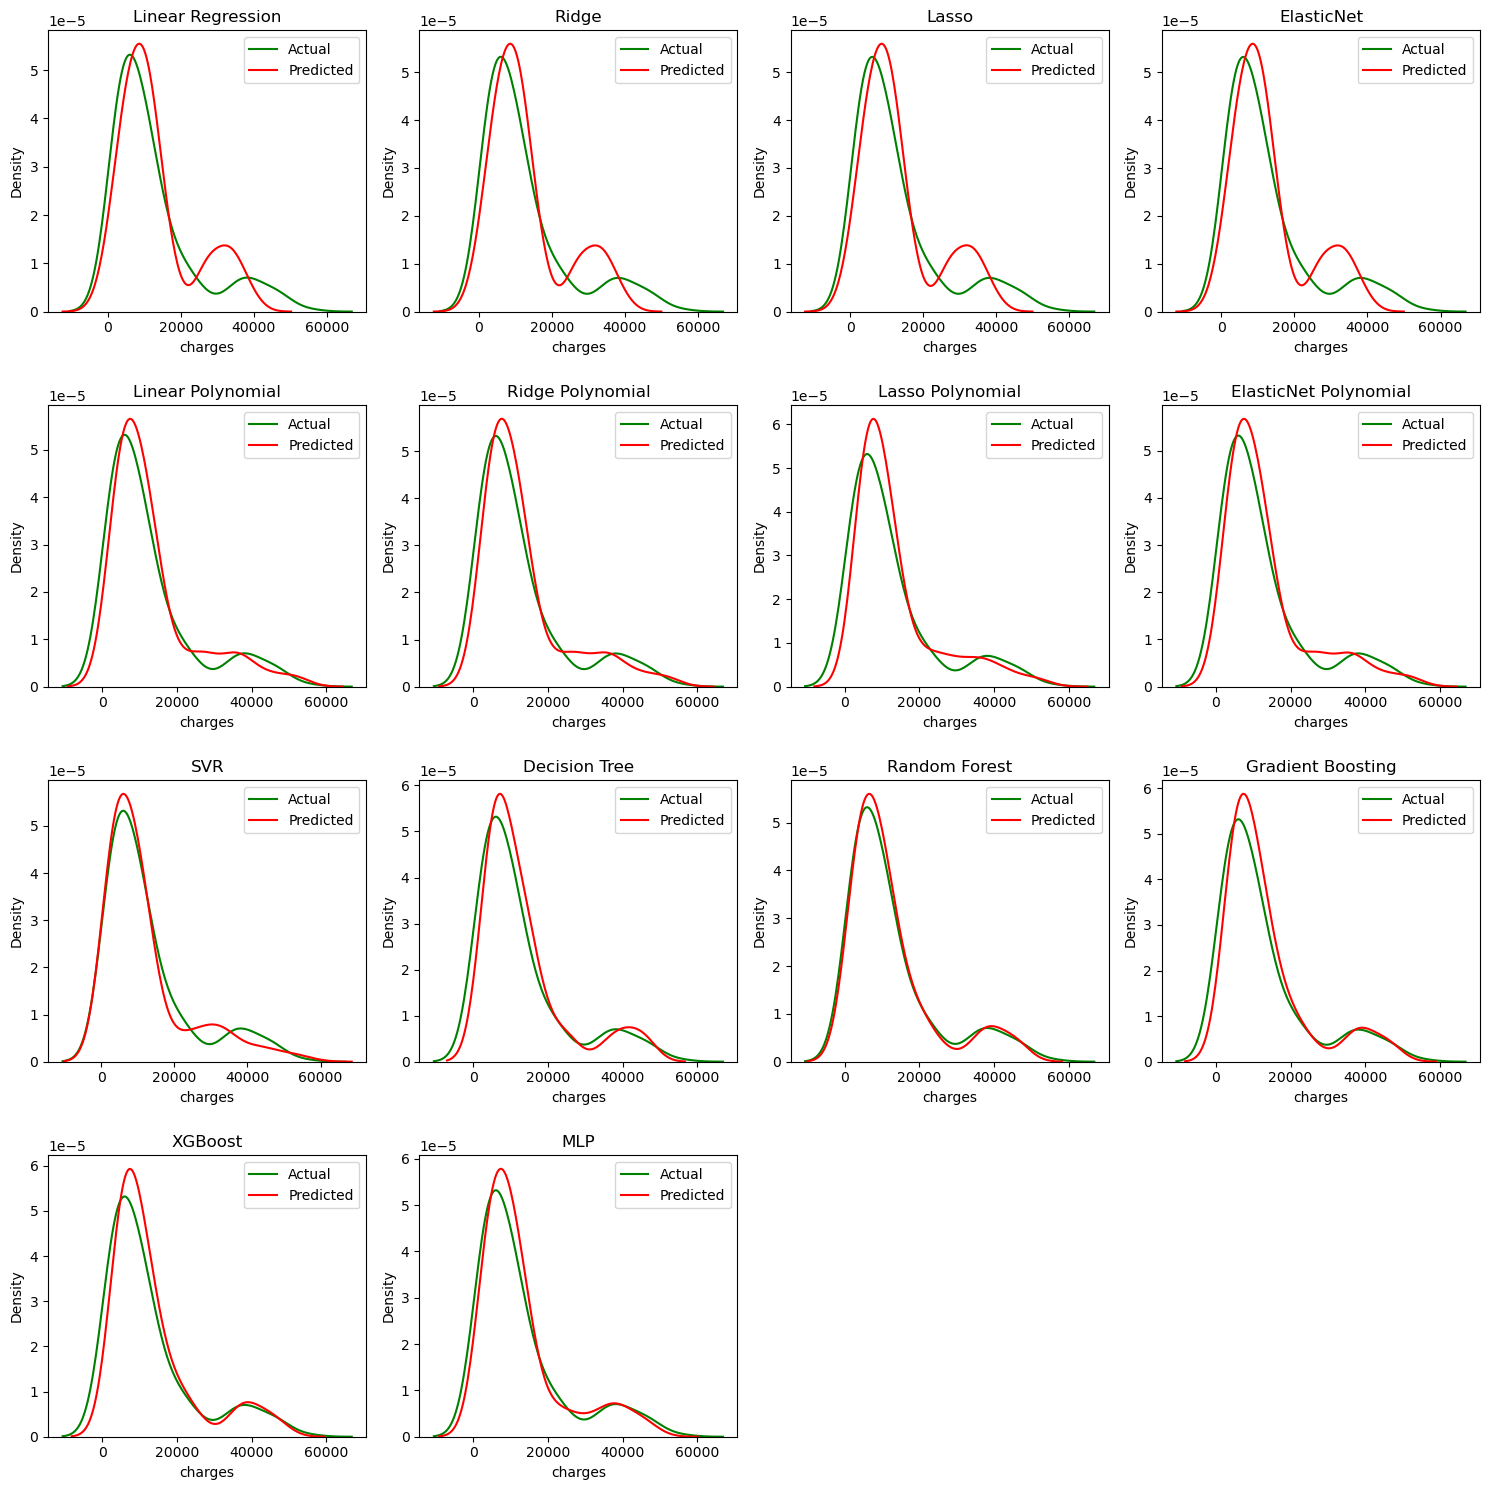

In [514]:
plt.figure(figsize=(15,15))
a=1
for i , model in zip(y_pred,model_names):
    plt.subplot(4,4,a)
    sns.distplot(y_test,hist=False,color = "g", label="Actual")
    sns.distplot(i,hist=False,color = "r", label= "Predicted")
    plt.title(model)
    plt.legend()
    a=a+1
plt.tight_layout()

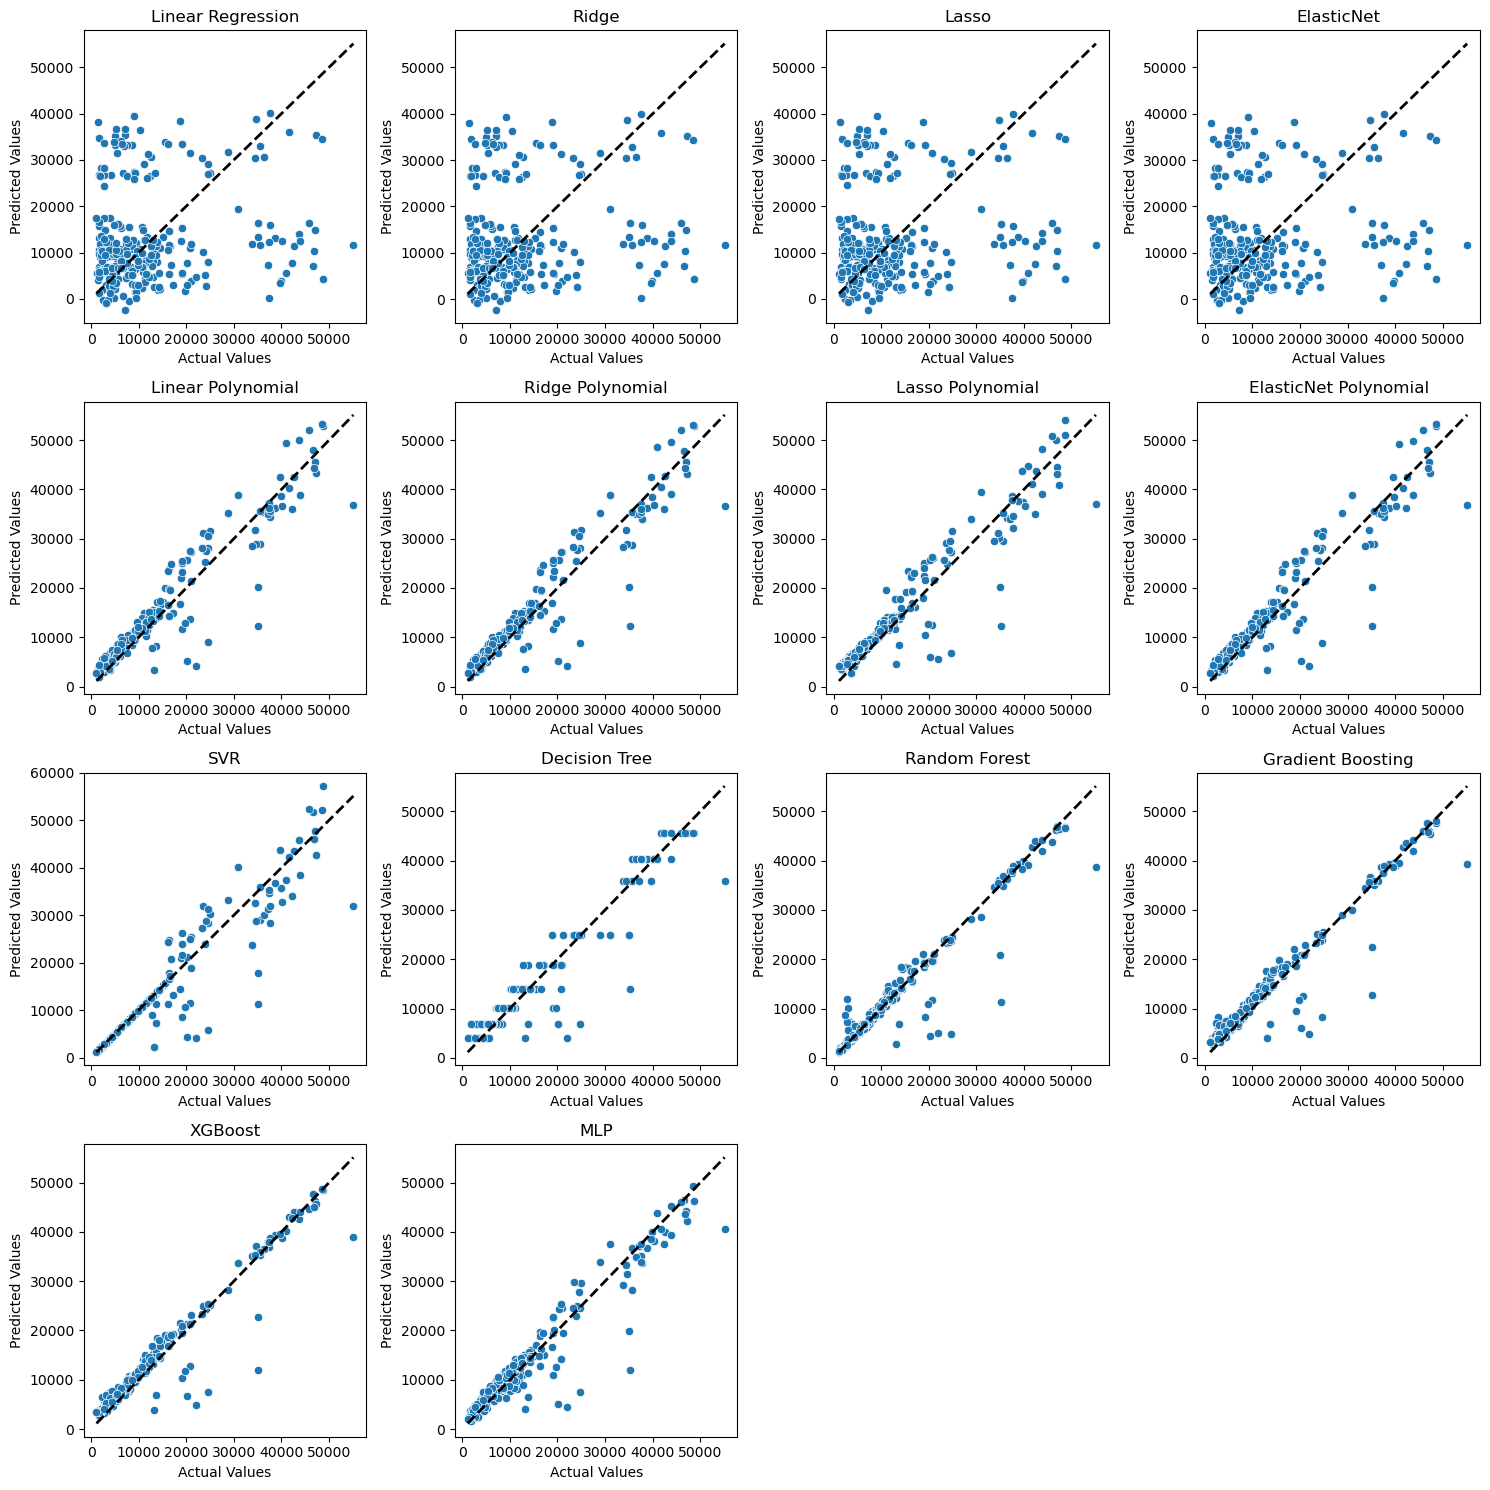

In [515]:
plt.figure(figsize=(15,15))
a=1
for i, model in zip(y_pred, model_names):
    plt.subplot(4,4,a)
    sns.scatterplot(x = y_test, y = i)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
    plt.title(model)
    plt.xlabel("Actual Values" )
    plt.ylabel("Predicted Values")
    a=a+1
plt.tight_layout()

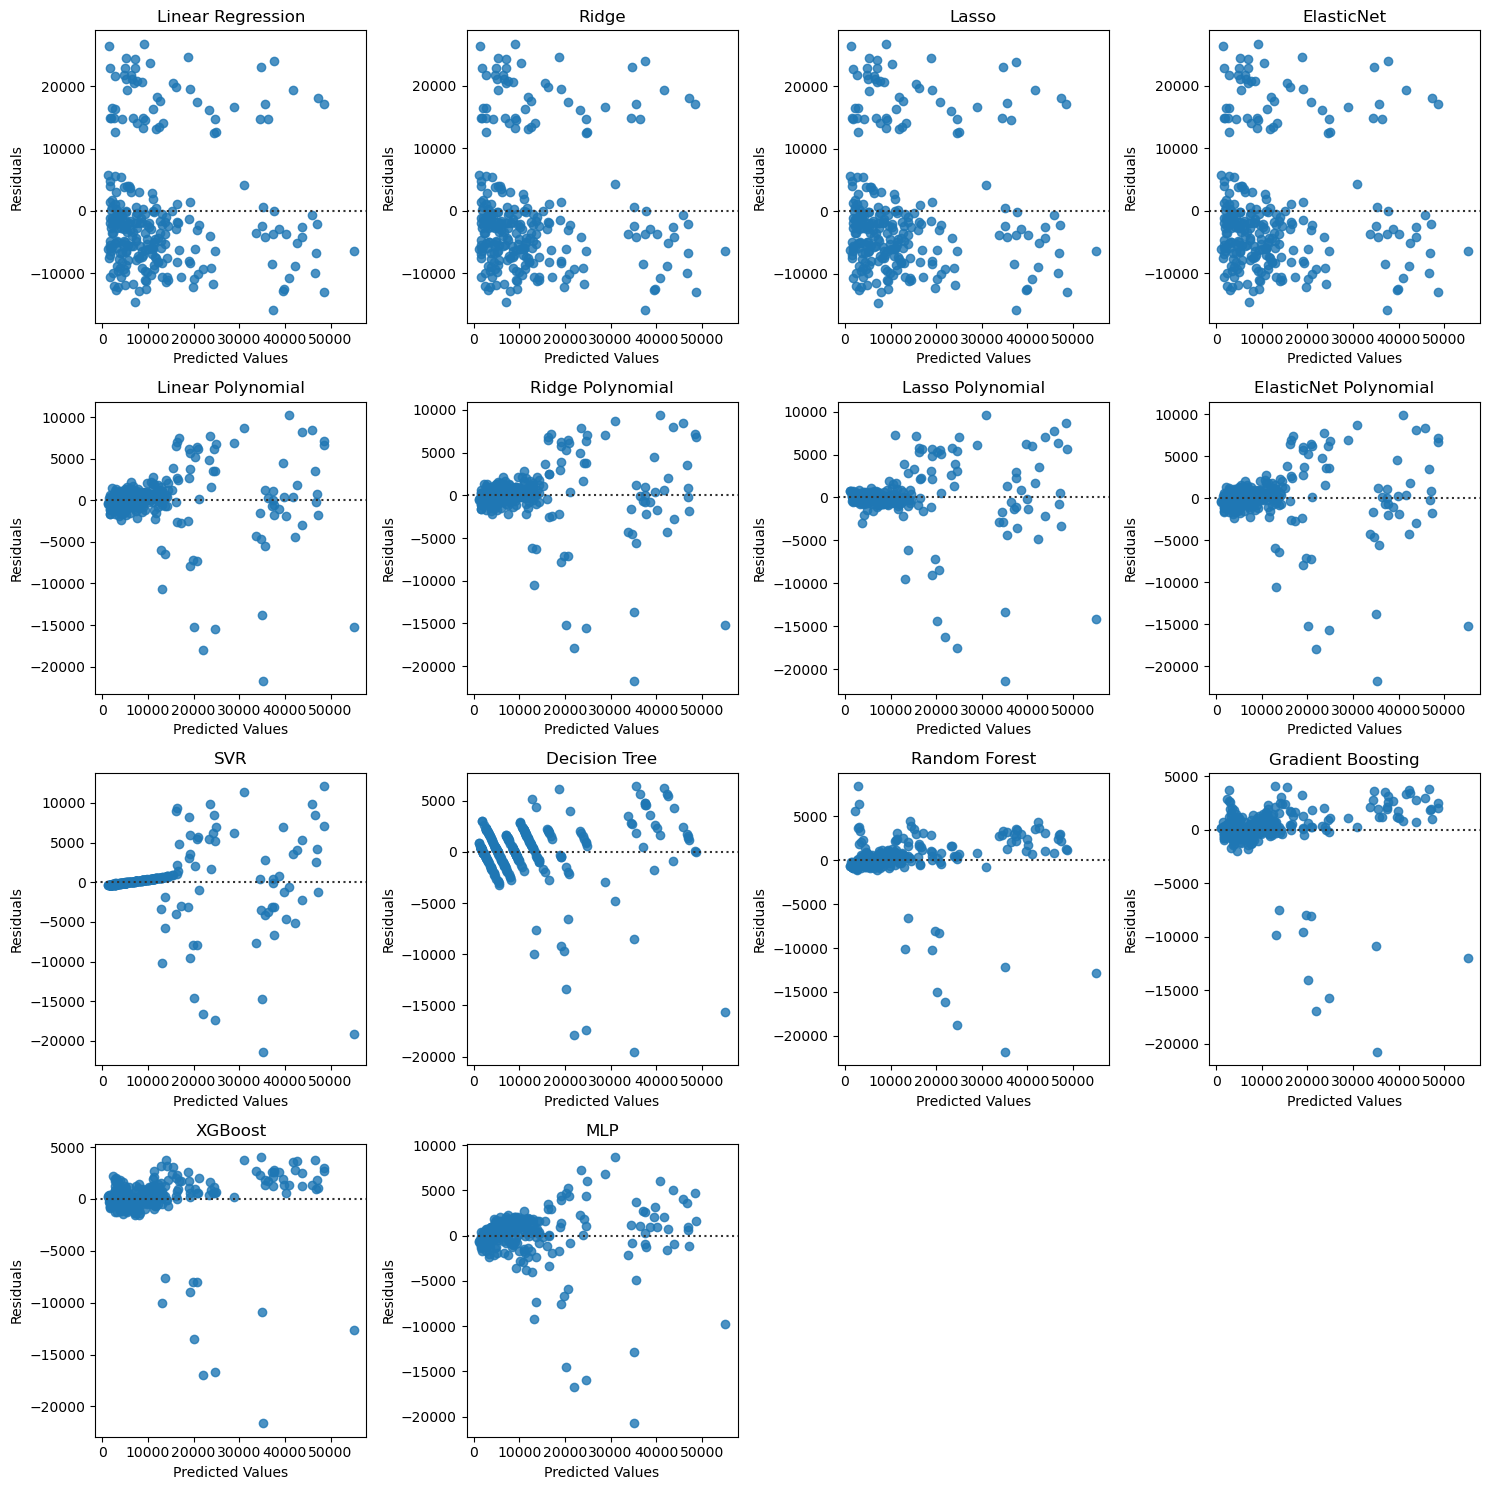

In [516]:
plt.figure(figsize=(15,15))
a=1
for i, model in zip(y_pred, model_names):
    plt.subplot(4,4,a)
    sns.residplot(x = y_test, y = i, )
    plt.title(model)
    plt.xlabel("Predicted Values")         
    plt.ylabel("Residuals") 
    a=a+1
plt.tight_layout()


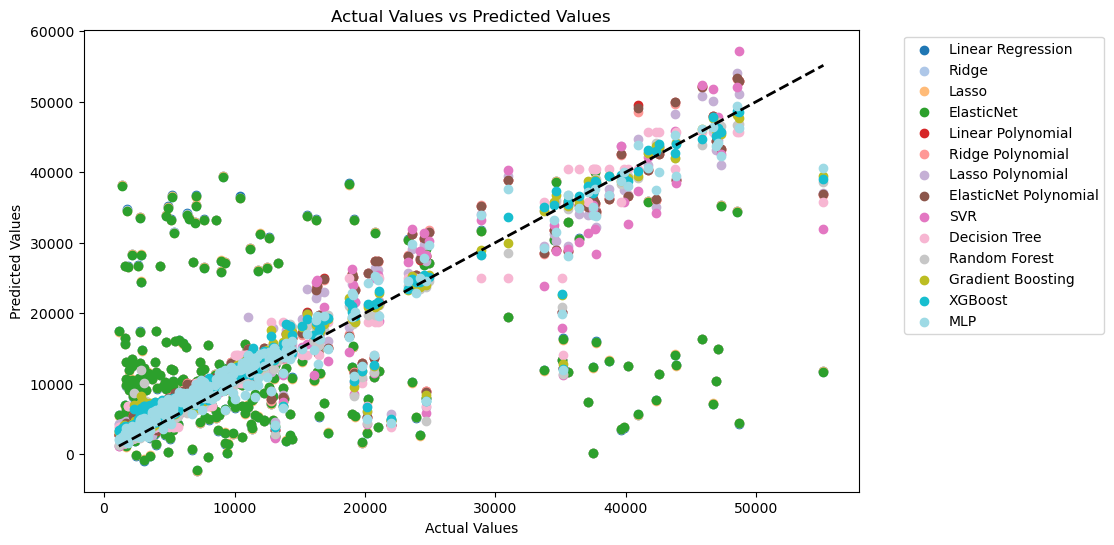

In [517]:
plt.figure(figsize=(10,6))
predicted_values = [y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_elasticnet,y_hat_poly_linear,y_hat_poly_ridge,y_hat_poly_lasso,y_hat_poly_elasticnet,
       y_hat_svr,y_hat_decision_tree,y_hat_rf,y_hat_gbr,y_hat_xgbr,y_hat_mlpr]

labels = ['Linear Regression','Ridge','Lasso','ElasticNet','Linear Polynomial','Ridge Polynomial','Lasso Polynomial','ElasticNet Polynomial','SVR',
       'Decision Tree','Random Forest','Gradient Boosting','XGBoost','MLP'
      ]
colors = plt.cm.tab20(np.linspace(0, 1, len(predicted_values)))

for y_predicted,label,color in zip(predicted_values,labels,colors):
    plt.scatter(x = y_test, y = y_predicted,label = label,color=color)
    
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Actual Values vs Predicted Values" )
plt.xlabel("Actual Values" )
plt.ylabel("Predicted Values")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  

plt.show()

### Model Performance Overview by plots

#### 1. **Distribution Plot (y_hat vs y_test)**:

- The predicted distributions (y_hat) of **Random Forest**, **Gradient Boosting Regressor (GBR)**, **XGBoost Regressor (XGBR)**, and **MLP Regressor (MLPR)** are highly aligned with the actual test values (**y_test**).
- **Random Forest**'s distribution is perfectly aligned with the actual charges, indicating the model's accurate prediction performance. This suggests that Random Forest is capturing the patterns in the data most effectively, followed by **GBR and XGBR**.
- The other models, while also performing well, show slight misalignment with the actual values.

#### 2. **Scatter Plot (Predicted vs Actual Charges)**

- **Random Forest**, **Gradient Boosting**, and **XGBoost** provide accurate predictions, as reflected by the near-perfect alignment in the scatter plot. The points for these models lie close to the line of perfect prediction (y = x), indicating that they are predicting insurance charges accurately.
- **Linear Polynomial**, **Ridge Polynomial**, **Lasso Polynomial**, **ElasticNet Polynomial**, and **MLP Regressor (MLPR)** also show good predictions but with slight deviations, particularly in the tails of the data.

#### 3. **Residual Plot (Residuals vs Predicted Charges)**

- **Random Forest**, **Gradient Boosting**, and **XGBoost** show residuals that are nearly centered around zero. This indicates that these models are making unbiased predictions, with no systematic errors in their predictions.
- The residuals for **Random Forest** are particularly tight and close to zero, suggesting a well-calibrated model with minimal prediction errors.

### Model Performance Summary

- Based on the distribution, scatter, and residual plots, **Random Forest**, **Gradient Boosting**, and **XGBoost** stand out as the top performers. These models effectively capture the complexity of the data and make highly accurate predictions, with residuals that are near zero, indicating minimal bias and no systematic errors.
- **MLP Regressor (MLPR)** also shows good predictions, but its performance is slightly lower compared to the above models.
- **Polynomial Models**: Adding polynomial features improves the performance of **Linear**, **Ridge**, **Lasso** and  **ElasticNet** models, but they still do not outperform the other models in terms of capturing the underlying patterns in the data.


## Challenges Faced

The challenges faced in predicting insurance charges involved various aspects of **data preprocessing**, **feature engineering**, **model selection**, and **evaluation**. Despite these hurdles, through careful analysis, feature handling, and model optimization, the machine learning models were able to predict insurance charges with high accuracy, offering valuable insights into the factors influencing insurance charges. Below are the key challenges faced:

 **Data Scaling**:
- Features like **BMI** and **age** can have vastly different ranges compared to categorical variables like **gender** and **smoker status**. Proper scaling of continuous variables (e.g., using **MinMax scaling** and **Standardization**) was necessary for models sensitive to feature scaling, like linear regression or gradient-based methods.

 **Encoding Categorical Variables**:
- The dataset includes categorical variables such as **region**, **smoker**, and **gender**. These needed to be encoded into numerical values using techniques like **one-hot encoding** or **label encoding**, ensuring that models could handle them effectively.

 **Non-Linear Relationships**:
- Insurance charge predictions might exhibit **non-linear relationships** with features like **children**, **BMI**, and **smoking status**. Modeling these non-linear relationships required more sophisticated algorithms like **random forests** or **gradient boosting** rather than simpler **linear models**.


## Conclusion

In this project, multiple machine learning models were implemented and evaluated to predict insurance Charges. The models demonstrated high accuracy and solid performance in predicting insurance Charges. The following points summarize the key findings:

 **Gradient Boosting**:
- Achieved the highest **R² score** of **92.64%**, indicating excellent performance and a strong ability to explain the variance in the insurance price data.
- The model was evaluated using a **residual plot**, which showed a uniform distribution of residuals around zero, suggesting that the model's predictions are unbiased and well-calibrated.
- The **actual vs predicted scatter plot** further confirmed that the model's predictions closely align with the actual values, demonstrating a good fit to the data.

 **XGBoost**:
- Delivered a very competitive **R² score** of **92.52%**, showcasing its strong predictive power.
- The **actual vs predicted scatter plot** showed a tight correlation between the predicted and actual values, further validating the model's robustness in insurance price prediction.

 **Random Forest**:
- Achieved an **R² score** of **92.49%**, slightly lower than XGBoost and Gradient Boosting but still demonstrating high accuracy.
- The **density plots** of actual test values and predicted test values illustrated the model's capability to make precise predictions across different ranges of insurance prices.

 **Model Comparison**:
- All three models performed very well, with **R² scores** above **92%**, indicating that the models successfully captured the underlying patterns in the data.
- **Gradient Boosting** was the top performer, but **XGBoost** and **Random Forest** also provided competitive results with their own unique strengths (e.g., excellent scatter plot for XGBoost and density plot for Random Forest).

 **Key Takeaways**:
- The models achieved excellent performance, with very high **R² scores** across the board.
- **Gradient Boosting** was the most effective model overall, followed closely by **XGBoost** and **Random Forest**.
- The **evaluation plots** (**residual, scatter, and density**) provided valuable insights into the model's performance and confirmed their **predictive accuracy**.
